# Overview
This notebook provides a comprehensive approach to predicting Bitcoin prices for the year 2024, employing a variety of data analysis and machine learning techniques. We elaborate various stages of data handling, including loading, preprocessing, and visual analysis. Advanced predictive modeling techniques, involving neural networks  to forecast future prices.


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os





# Set Random Seed
tf.random.set_seed(42)

# Data Analysis

## Load The Data

In [ ]:

df = pd.read_csv("BTC-USD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-03-27,69991.898438,71727.687500,68381.929688,69455.343750,69455.343750,40827113309
2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,34374900617
2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,25230851763


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3484 entries, 2014-09-17 to 2024-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3484 non-null   float64
 1   High       3484 non-null   float64
 2   Low        3484 non-null   float64
 3   Close      3484 non-null   float64
 4   Adj Close  3484 non-null   float64
 5   Volume     3484 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 190.5 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3484.000000,3484.000000,3484.000000,3484.000000,3484.000000,3.484000e+03
mean,15582.531822,15948.705780,15195.879745,15601.429967,15601.429967,1.700667e+10
std,17217.188377,17636.354295,16767.261664,17238.021107,17238.021107,1.926938e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,994.657760,1010.955002,967.731247,997.339508,997.339508,2.009653e+08
50%,8598.533692,8755.779297,8325.447265,8598.909179,8598.909179,1.267487e+10
75%,26476.076660,26800.184082,26094.678711,26487.335449,26487.335449,2.731887e+10
max,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11


##  Exploratory Data Analysis Of The Features

### Closing price

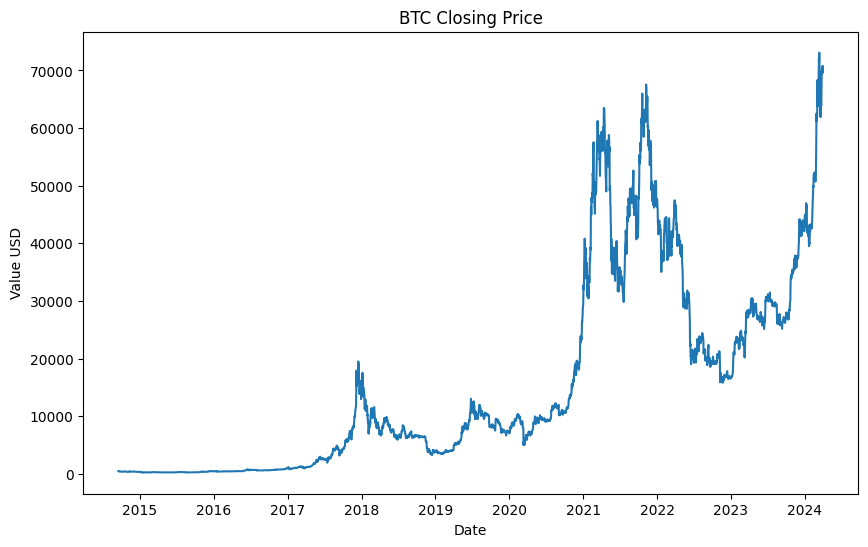

In [ ]:

# Plotting the Closing Price
plt.figure(figsize=(10, 6))
plt.plot( df['Close'])
plt.title('BTC Closing Price')
plt.xlabel('Date')
plt.ylabel('Value USD')

plt.show()

### Adjusted Closing Price

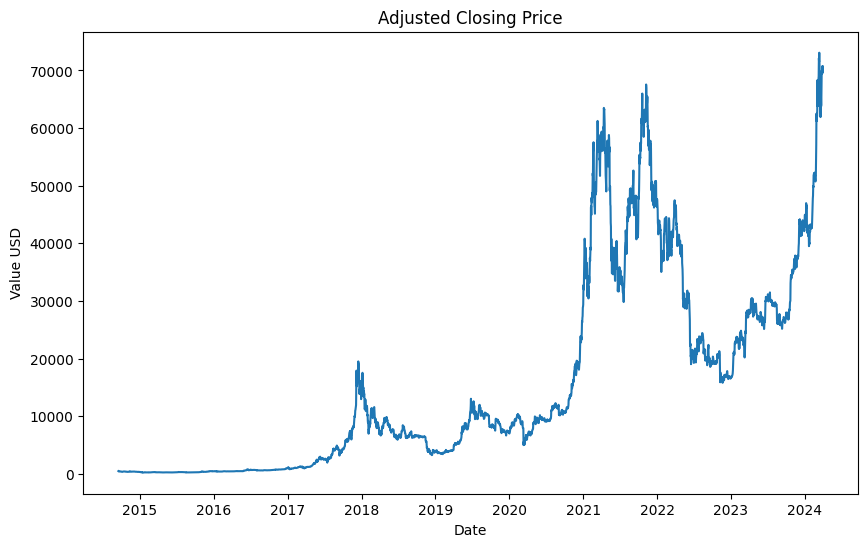

In [ ]:

# Plotting the Adjusted Closing Price
plt.figure(figsize=(10, 6))
plt.plot( df['Adj Close'])
plt.title('Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel('Value USD')

plt.show()

### Opening Price

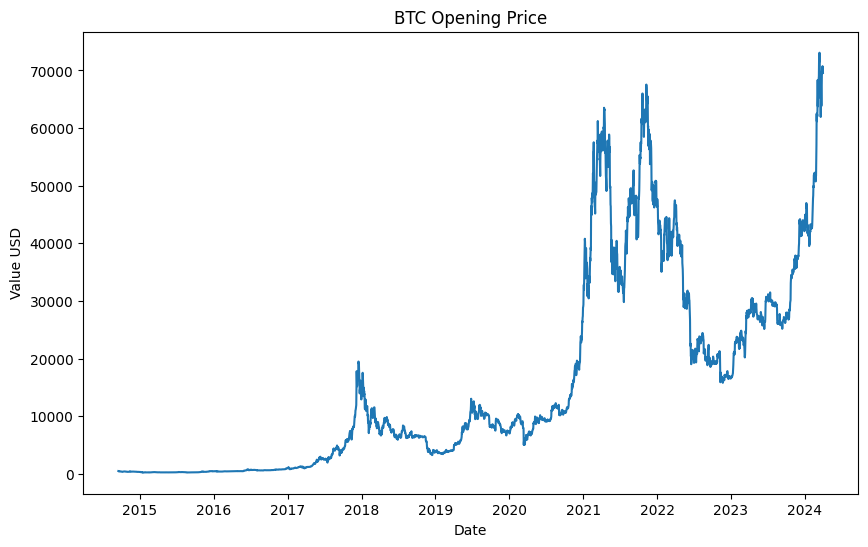

In [ ]:

# Plotting the Opening Price
plt.figure(figsize=(10, 6))
plt.plot( df['Open'])
plt.title('BTC Opening Price')
plt.xlabel('Date')
plt.ylabel('Value USD')

plt.show()

### High Price

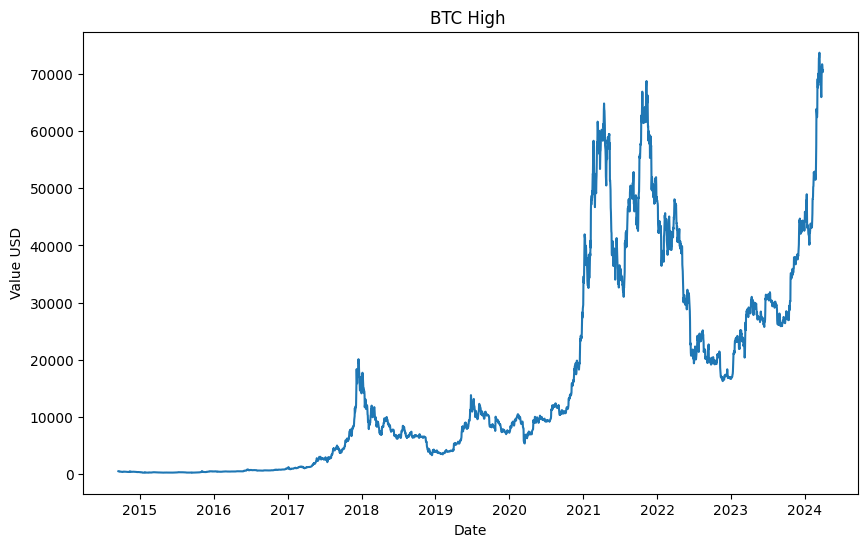

In [ ]:

# Plotting the High Price
plt.figure(figsize=(10, 6))
plt.plot( df['High'])
plt.title('BTC High ')
plt.xlabel('Date')
plt.ylabel('Value USD')

plt.show()

### Low Price

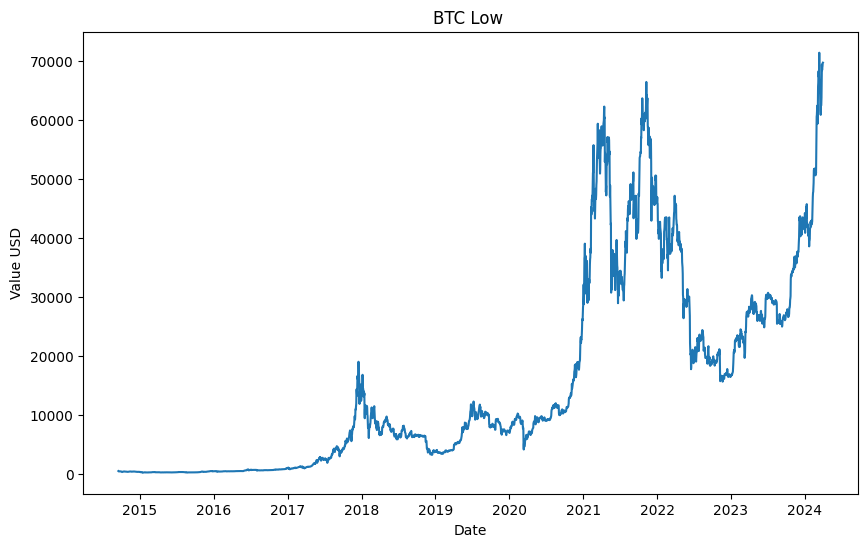

In [ ]:

# Plotting the Low Price
plt.figure(figsize=(10, 6))
plt.plot( df['Low'])
plt.title('BTC Low ')
plt.xlabel('Date')
plt.ylabel('Value USD')

plt.show()

### Low VS High VS Opening Price Comparaison

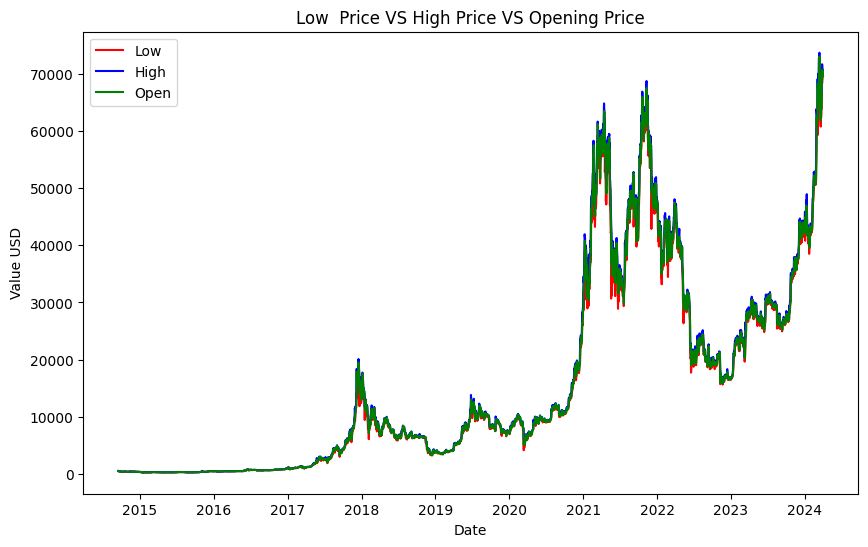

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Low'], color='red', label='Low')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.title('Low  Price VS High Price VS Opening Price')
plt.xlabel('Date')
plt.ylabel('Value USD')
plt.legend()

**NOTE** : We will be using the Closing Price for our BTC prediction model.

We will also build a plotting function of time series to mnimize code

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

### BTC Closing Price Analysis

In [ ]:
btc_price=df['Close']
btc_price.head()

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: Close, dtype: float64

In [ ]:
btc_price.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3484 entries, 2014-09-17 to 2024-03-31
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
3484 non-null   float64
dtypes: float64(1)
memory usage: 54.4 KB


In [ ]:
btc_price.describe()

count     3484.000000
mean     15601.429967
std      17238.021107
min        178.102997
25%        997.339508
50%       8598.909179
75%      26487.335449
max      73083.500000
Name: Close, dtype: float64

## Train Test Split For Naive Forecast

In [ ]:
date_btc_np=btc_price.index[:].to_numpy()

btc_price_np= btc_price[:].to_numpy()


In [ ]:
split_size=int(0.8 * len(btc_price_np))
split_size

2787

In [ ]:
x_train, y_train= date_btc_np[:split_size], btc_price_np[:split_size]

x_test , y_test= date_btc_np[split_size:], btc_price_np[split_size:]



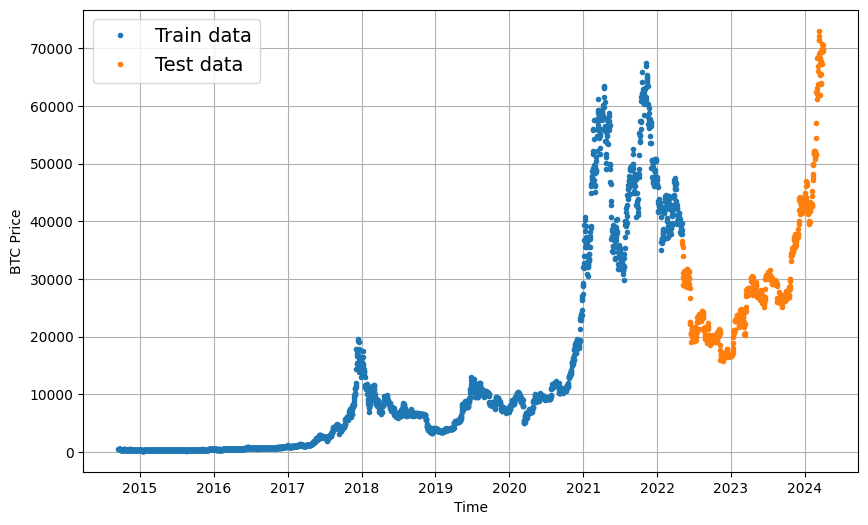

In [ ]:
plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")

## Preprocessing & Train Test Split using window label

In [ ]:
# Set the Horizon and window size
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  Eg: if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  #  Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  #  Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  #  Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(btc_price_np, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(3477, 3477)

In [ ]:
for i in range(3):
  print(f"Window {i} : {full_windows[i]} -> Label: {full_labels[i]}")
  print(30*'---')

Window 0 : [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
------------------------------------------------------------------------------------------
Window 1 : [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
------------------------------------------------------------------------------------------
Window 2 : [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]
------------------------------------------------------------------------------------------


In [ ]:
def train_test_splits_windows_labels(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = train_test_splits_windows_labels(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2781, 696, 2781, 696)

## Function To Save Models Chekpoints  

In [ ]:

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="models_checkpoints"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0,
                                            save_best_only=True) # save only the best model to file

## Evaluation function

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implementation of  MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:

def evaluate_preds(y_true, y_pred):
  """
  Time series evaluation function (MAE, MSE, RMSE, MAPE, MASE)

  """
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {"MAE": mae.numpy(),
          "MSE": mse.numpy(),
          "RMSE": rmse.numpy(),
          "MAPE": mape.numpy(),
          "MASE": mase.numpy()}


# Modelling

We will try to forecast the Closing price of bitcoin using the following approaches :

* Naive Forecast:  this simple model sets each prediction to be the previous observed value.
* Dense Model Forecast: Utilizes a fully connected neural network structure. Several configurations are tested:
   - W=7, H=1: 7-day window to predict the next day.
   - W=30, H=1: 30-day window to predict the next day.
   - W=30, H=7: 30-day window to predict the next week.
* Conv1D Model W=7, H=1: A convolutional neural network model that uses a 1-dimensional convolution over a window of 7 days to predict the next day.
* LSTM Model W=7, H=1: Employs an LSTM (Long Short-Term Memory) network, which is effective for sequences and time series data.
* N-Beats Model: A 2020 M4 competition winner deep learning architecture specifically designed for time series forecasting.

## Naive Forecast

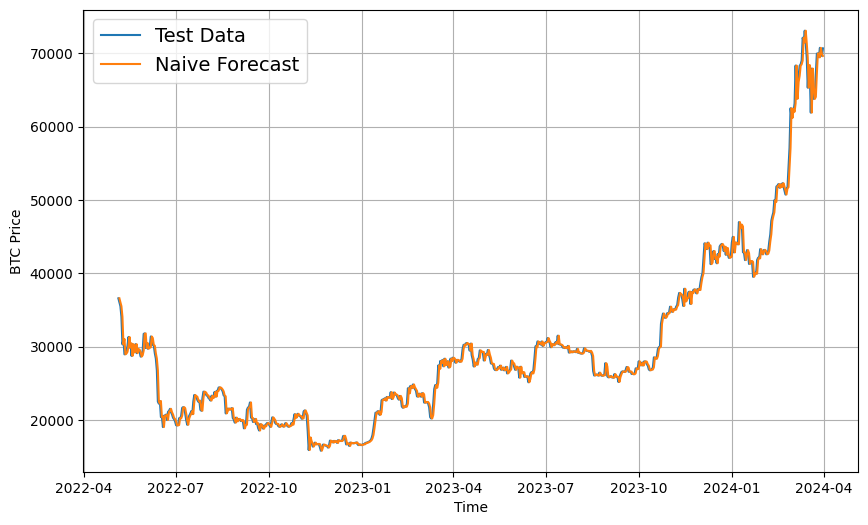

In [ ]:
naive_forecast = y_test[:-1]

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test,values=y_test,start=0,format='-',label='Test Data')

plot_time_series(timesteps=x_test[1:],values=naive_forecast,start=0,format='-',label='Naive Forecast')


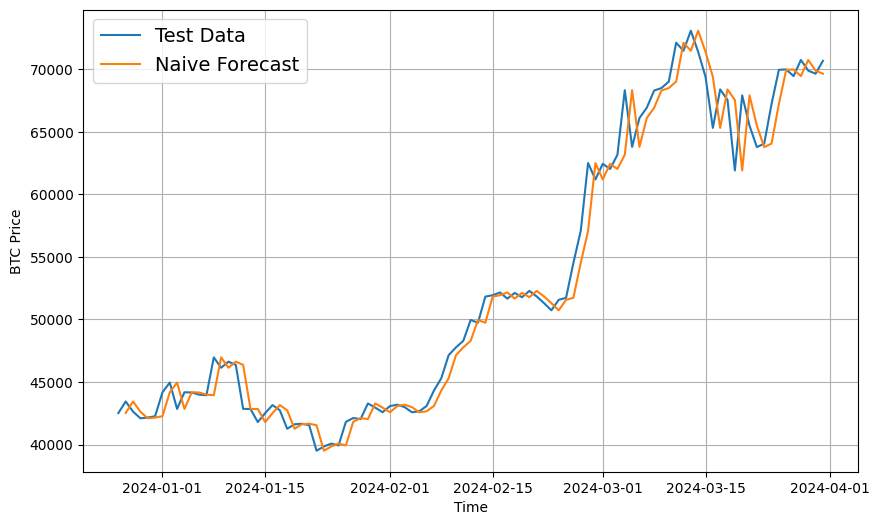

In [ ]:
# let's zoom in it a bit

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test,values=y_test,start=600,format='-',label='Test Data')

plot_time_series(timesteps=x_test[1:],values=naive_forecast,start=600,format='-',label='Naive Forecast')


In [ ]:
### Naive Forecast Evaluation :

naive_forecast_eval = evaluate_preds(y_test[1:],naive_forecast)

naive_forecast_eval


{'MAE': 563.3162,
 'MSE': 884411.94,
 'RMSE': 940.4318,
 'MAPE': 1.8523067,
 'MASE': 0.99992555}

## Dense Model Forecast (W=7 , H=1)

In [ ]:
inputs = tf.keras.layers.Input(shape=(None,7),dtype=tf.float32)

x = tf.keras.layers.Dense(128,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(HORIZON,activation='linear')(x)


model_dense=tf.keras.Model(inputs,outputs,name="model_dense")

In [ ]:
model_dense.summary()

Model: "model_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, 7)]         0         
                                                                 
 dense_64 (Dense)            (None, None, 128)         1024      
                                                                 
 dense_65 (Dense)            (None, None, 64)          8256      
                                                                 
 dense_66 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 9345 (36.50 KB)
Trainable params: 9345 (36.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_dense.compile(loss='mae',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])

In [ ]:
model_dense.fit(x=train_windows,
                y=train_labels,
                epochs=100,
                batch_size=128,
                validation_data=(test_windows,test_labels),
                callbacks=[create_model_checkpoint(model_dense.name,'models_chekpoints')])

Epoch 1/100
22/22 [==============================] - 2s 45ms/step - loss: 6683.3062 - mae: 6683.3062 - mse: 211376528.0000 - val_loss: 4552.3296 - val_mae: 4552.3296 - val_mse: 25554120.0000
Epoch 2/100
22/22 [==============================] - 1s 35ms/step - loss: 921.4861 - mae: 921.4861 - mse: 3672125.7500 - val_loss: 1115.5275 - val_mae: 1115.5275 - val_mse: 2964976.7500
Epoch 3/100
22/22 [==============================] - 1s 35ms/step - loss: 604.7424 - mae: 604.7424 - mse: 1708074.3750 - val_loss: 926.4584 - val_mae: 926.4584 - val_mse: 2126789.2500
Epoch 4/100
22/22 [==============================] - 1s 35ms/step - loss: 529.3463 - mae: 529.3463 - mse: 1303196.7500 - val_loss: 855.3012 - val_mae: 855.3012 - val_mse: 1703817.7500
Epoch 5/100
22/22 [==============================] - 1s 35ms/step - loss: 503.1056 - mae: 503.1056 - mse: 1183023.6250 - val_loss: 766.6545 - val_mae: 766.6545 - val_mse: 1484693.3750
Epoch 6/100
22/22 [==============================] - 1s 51ms/step - los

In [ ]:
model_dense_pred = tf.squeeze( model_dense.predict(test_windows))

model_dense_eval=evaluate_preds(y_true=tf.squeeze(test_labels) , y_pred=model_dense_pred )

model_dense_eval



22/22 [==============================] - 0s 3ms/step


{'MAE': 561.33405,
 'MSE': 875834.1,
 'RMSE': 935.8601,
 'MAPE': 1.8578775,
 'MASE': 0.9964071}

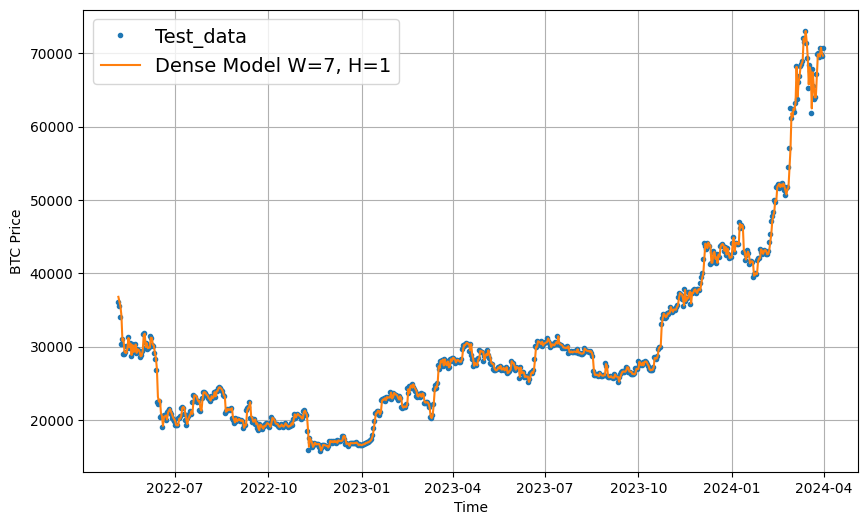

In [ ]:

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=0, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_dense_pred, start=0, format="-", label="Dense Model W=7, H=1")





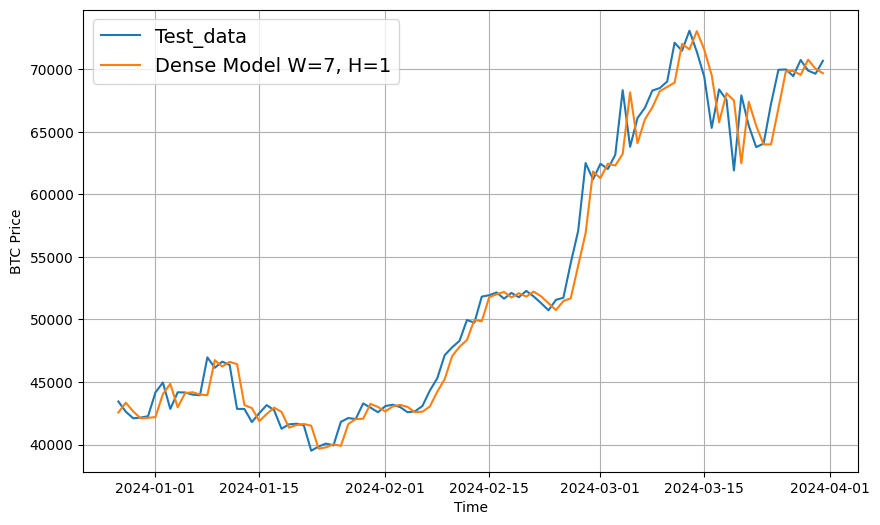

In [ ]:
# let's zoom in it a bit

plt.figure(figsize=(10,6))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='-', start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_dense_pred, start=600, format="-", label="Dense Model W=7, H=1")



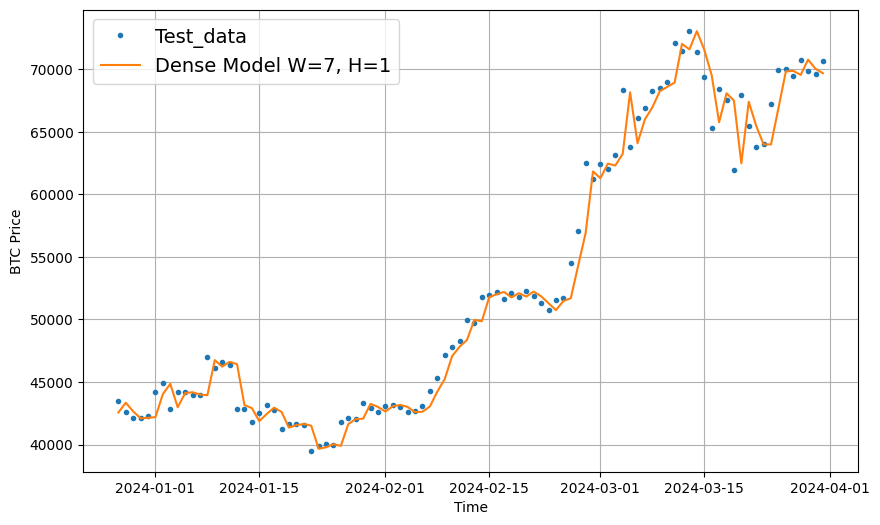

In [ ]:
# let's zoom in it a bit  and use the '.' for test data

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='.',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_dense_pred, start=600, format="-", label="Dense Model W=7, H=1")


## Dense Model Forecast (W=30 , H=1)

In [ ]:

HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 30 # use a month worth of timesteps to predict the horizon

In [ ]:
full_windows_30, full_labels_30 = make_windows(btc_price_np, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows_30), len(full_labels_30)


(3454, 3454)

In [ ]:
train_windows_30, test_windows_30, train_labels_30, test_labels_30 = train_test_splits_windows_labels(full_windows_30, full_labels_30)
len(train_windows_30), len(test_windows_30), len(train_labels_30), len(test_labels_30)

(2763, 691, 2763, 691)

In [ ]:
inputs = tf.keras.layers.Input(shape=(None,30),dtype=tf.float32)

x = tf.keras.layers.Dense(128,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(HORIZON,activation='linear')(x)

model_dense_30=tf.keras.Model(inputs,outputs,name="model_dense_30")

In [ ]:
model_dense_30.summary()

Model: "model_dense_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, 30)]        0         
                                                                 
 dense_67 (Dense)            (None, None, 128)         3968      
                                                                 
 dense_68 (Dense)            (None, None, 64)          8256      
                                                                 
 dense_69 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_dense_30.compile(loss='mae',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])

In [ ]:
model_dense_30.fit(x=train_windows_30,
                y=train_labels_30,
                epochs=100,
                batch_size=128,
                validation_data=(test_windows_30,test_labels_30),
                callbacks=[create_model_checkpoint(model_dense_30.name,'models_chekpoints')])

Epoch 1/100
22/22 [==============================] - 2s 43ms/step - loss: 2378.8557 - mae: 2378.8557 - mse: 28092696.0000 - val_loss: 3285.3994 - val_mae: 3285.3994 - val_mse: 17338762.0000
Epoch 2/100
22/22 [==============================] - 1s 35ms/step - loss: 900.0222 - mae: 900.0222 - mse: 3454884.7500 - val_loss: 1083.4137 - val_mae: 1083.4137 - val_mse: 2658219.2500
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 658.8765 - mae: 658.8765 - mse: 2024189.3750 - val_loss: 1245.6698 - val_mae: 1245.6698 - val_mse: 2898768.5000
Epoch 4/100
22/22 [==============================] - 1s 36ms/step - loss: 658.4410 - mae: 658.4410 - mse: 1921871.7500 - val_loss: 943.9385 - val_mae: 943.9385 - val_mse: 1978674.0000
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 575.0845 - mae: 575.0845 - mse: 1524871.1250 - val_loss: 1035.7152 - val_mae: 1035.7152 - val_mse: 2270574.7500
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - los

In [ ]:
model_dense_30_pred = tf.squeeze( model_dense_30.predict(test_windows_30))

model_dense_30_eval=evaluate_preds(y_true=tf.squeeze(test_labels_30) , y_pred=model_dense_30_pred )


model_dense_30_eval


22/22 [==============================] - 0s 2ms/step


{'MAE': 626.3609,
 'MSE': 977026.9,
 'RMSE': 988.44666,
 'MAPE': 2.0976772,
 'MASE': 1.1284975}

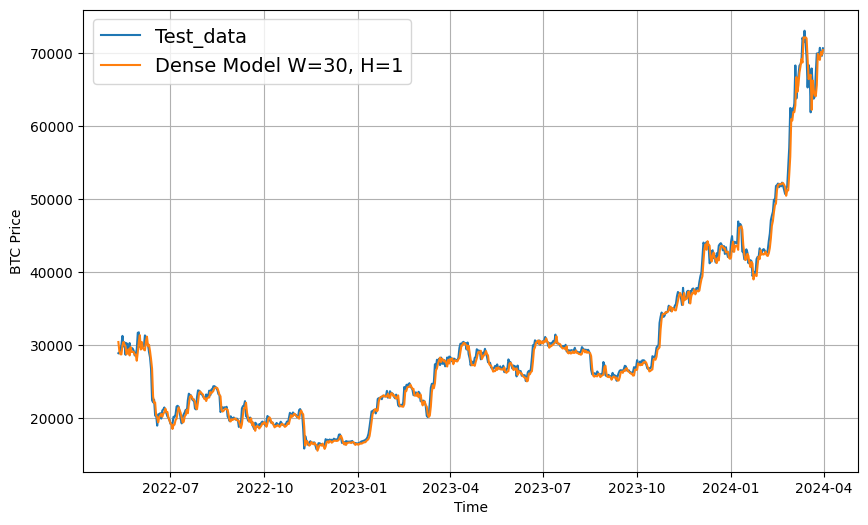

In [ ]:

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows_30):], values=test_labels_30[:, 0], format='-',start=0, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows_30):], values=model_dense_30_pred, start=0, format="-", label="Dense Model W=30, H=1")


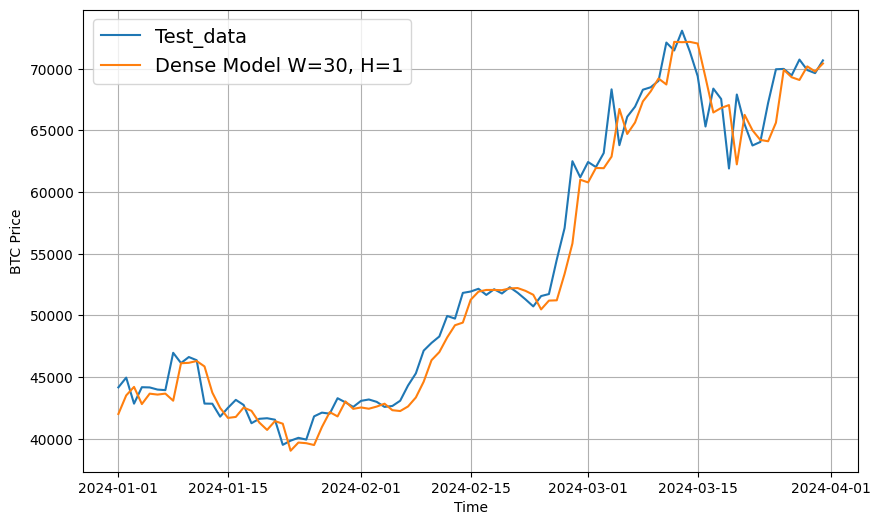

In [ ]:
# let's zoom in it a bit

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows_30):], values=test_labels_30[:, 0], format='-',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows_30):], values=model_dense_30_pred, start=600, format="-", label="Dense Model W=30, H=1")


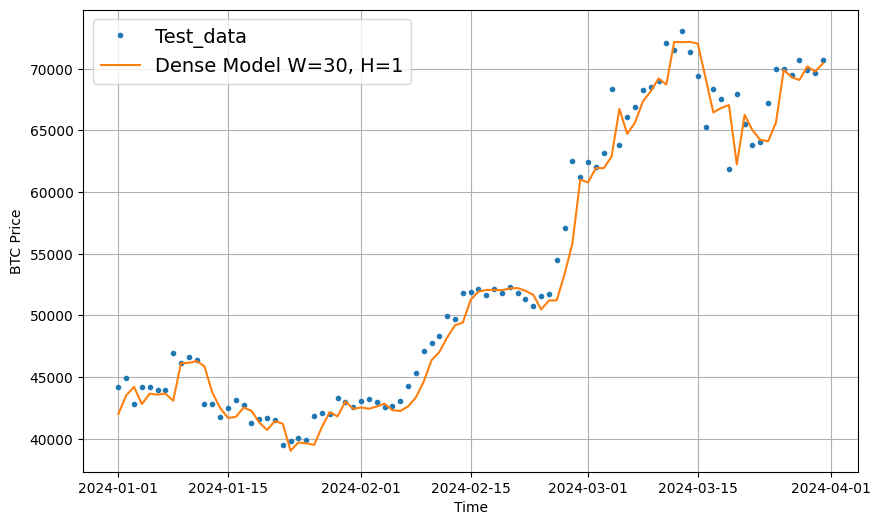

In [ ]:


plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows_30):], values=test_labels_30[:, 0], format='.',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows_30):], values=model_dense_30_pred, start=600, format="-", label="Dense Model W=30, H=1")



## Dense Model Forecast (W=30 , H=7)

In [ ]:

HORIZON = 7 # predict 7 steps at a time
WINDOW_SIZE = 30 # use a month worth of timesteps to predict the horizon

In [ ]:
full_windows_30_7, full_labels_30_7 = make_windows(btc_price_np, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows_30_7), len(full_labels_30_7)


(3448, 3448)

In [ ]:
train_windows_30_7, test_windows_30_7, train_labels_30_7, test_labels_30_7 = train_test_splits_windows_labels(full_windows_30_7, full_labels_30_7)
len(train_windows_30_7), len(test_windows_30_7), len(train_labels_30_7), len(test_labels_30_7)

(2758, 690, 2758, 690)

In [ ]:
inputs = tf.keras.layers.Input(shape=(None,30),dtype=tf.float32)

x = tf.keras.layers.Dense(128,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(HORIZON,activation='linear')(x)

model_dense_30_7=tf.keras.Model(inputs,outputs,name="model_dense_30_7")

In [ ]:
model_dense_30_7.summary()

Model: "model_dense_30_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, 30)]        0         
                                                                 
 dense_70 (Dense)            (None, None, 128)         3968      
                                                                 
 dense_71 (Dense)            (None, None, 64)          8256      
                                                                 
 dense_72 (Dense)            (None, None, 7)           455       
                                                                 
Total params: 12679 (49.53 KB)
Trainable params: 12679 (49.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_dense_30_7.compile(loss='mae',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])

In [ ]:
model_dense_30_7.fit(x=train_windows_30_7,
                y=train_labels_30_7,
                epochs=100,
                batch_size=128,
                validation_data=(test_windows_30_7,test_labels_30_7),
                callbacks=[create_model_checkpoint(model_dense_30_7.name,'models_chekpoints')])

Epoch 1/100
22/22 [==============================] - 3s 67ms/step - loss: 7525.6387 - mae: 7525.6387 - mse: 287390080.0000 - val_loss: 8344.3477 - val_mae: 8344.3477 - val_mse: 247648144.0000
Epoch 2/100
22/22 [==============================] - 1s 39ms/step - loss: 2132.7390 - mae: 2132.7390 - mse: 31322160.0000 - val_loss: 2440.7764 - val_mae: 2440.7764 - val_mse: 12401362.0000
Epoch 3/100
22/22 [==============================] - 1s 36ms/step - loss: 1233.3517 - mae: 1233.3517 - mse: 6695766.5000 - val_loss: 1995.3960 - val_mae: 1995.3960 - val_mse: 8808887.0000
Epoch 4/100
22/22 [==============================] - 1s 33ms/step - loss: 1085.1537 - mae: 1085.1537 - mse: 5279804.5000 - val_loss: 1834.1223 - val_mae: 1834.1223 - val_mse: 7404894.0000
Epoch 5/100
22/22 [==============================] - 1s 34ms/step - loss: 1019.1359 - mae: 1019.1359 - mse: 4719442.0000 - val_loss: 1678.9031 - val_mae: 1678.9031 - val_mse: 6617490.0000
Epoch 6/100
22/22 [==============================] - 1

In [ ]:
model_dense_30_7_pred = tf.squeeze( model_dense_30_7.predict(test_windows_30_7))

model_dense_30_7_eval=evaluate_preds(y_true=tf.squeeze(test_labels_30_7) , y_pred=model_dense_30_7_pred )


model_dense_30_7_eval


22/22 [==============================] - 0s 2ms/step


{'MAE': 1226.425,
 'MSE': 3682160.8,
 'RMSE': 1406.5244,
 'MAPE': 4.1528106,
 'MASE': 2.1964705}

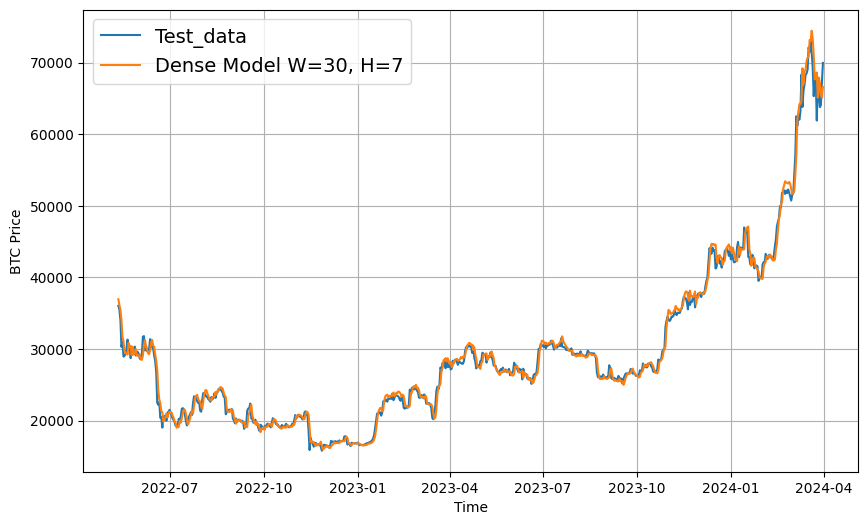

In [ ]:

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows_30_7):], values=test_labels_30_7[:, 0], format='-',start=0, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows_30_7):], values=tf.reduce_mean(model_dense_30_7_pred,axis=1), start=0, format="-", label="Dense Model W=30, H=7")


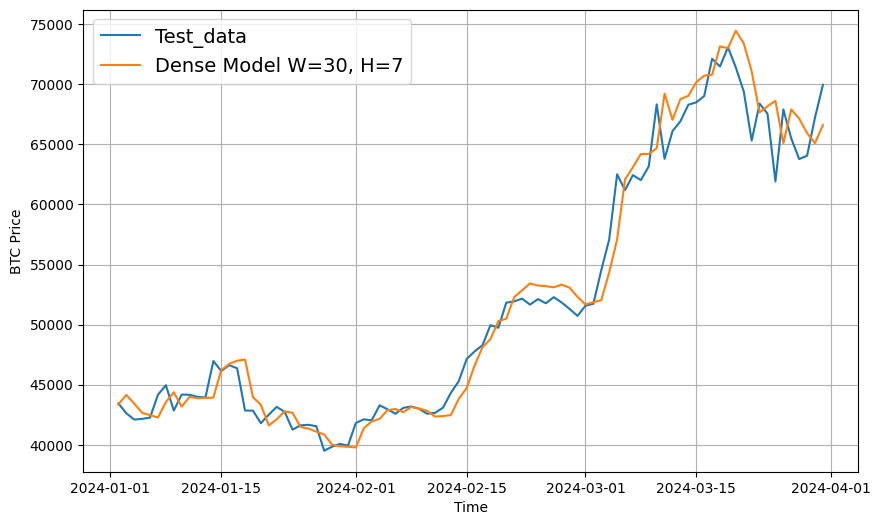

In [ ]:
# let's zoom in it a bit

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows_30_7):], values=test_labels_30_7[:, 0], format='-',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows_30_7):], values=tf.reduce_mean(model_dense_30_7_pred,axis=1), start=600, format="-", label="Dense Model W=30, H=7")

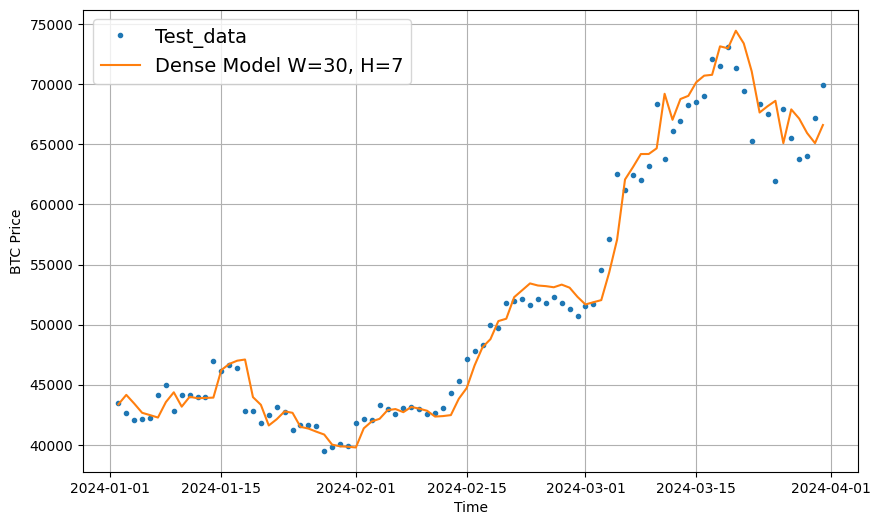

In [ ]:


plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows_30_7):], values=test_labels_30_7[:, 0], format='.',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows_30_7):], values=tf.reduce_mean(model_dense_30_7_pred,axis=1), start=600, format="-", label="Dense Model W=30, H=7")


## Conv1D Model W=7, H=1

In [ ]:
inputs = tf.keras.layers.Input(shape=(None,7),dtype=tf.float32)

x= tf.keras.layers.Lambda(lambda l: tf.expand_dims(l, axis=1))(inputs)

x=tf.keras.layers.Conv1D(filters=128,kernel_size=5, strides=1 , padding='causal', activation='relu' )(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(1,activation='linear')(x)


Conv1D_model=tf.keras.Model(inputs,outputs,name="Conv1D_model")

In [ ]:
Conv1D_model.summary()

Model: "Conv1D_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, 7)]         0         
                                                                 
 lambda_2 (Lambda)           (None, 1, None, 7)        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, None, 128)      4608      
                                                                 
 dense_73 (Dense)            (None, 1, None, 64)       8256      
                                                                 
 dense_74 (Dense)            (None, 1, None, 1)        65        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (50.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Conv1D_model.compile(loss='mae',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])

In [ ]:
Conv1D_model.fit(x=train_windows,
                y=train_labels,
                epochs=100,
                batch_size=128,
                validation_data=(test_windows,test_labels),
                callbacks=[create_model_checkpoint(Conv1D_model.name,'models_chekpoints')])

Epoch 1/100
22/22 [==============================] - 2s 52ms/step - loss: 5988.8916 - mae: 5988.8916 - mse: 156443232.0000 - val_loss: 4189.4590 - val_mae: 4189.4590 - val_mse: 21751600.0000
Epoch 2/100
22/22 [==============================] - 2s 80ms/step - loss: 899.7673 - mae: 899.7673 - mse: 3421719.5000 - val_loss: 1187.5630 - val_mae: 1187.5630 - val_mse: 2771356.2500
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 629.6170 - mae: 629.6170 - mse: 1813466.1250 - val_loss: 1194.5729 - val_mae: 1194.5729 - val_mse: 3168917.0000
Epoch 4/100
22/22 [==============================] - 1s 42ms/step - loss: 600.4294 - mae: 600.4294 - mse: 1650236.2500 - val_loss: 971.0767 - val_mae: 971.0767 - val_mse: 2305145.2500
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 588.7452 - mae: 588.7452 - mse: 1602648.7500 - val_loss: 976.1926 - val_mae: 976.1926 - val_mse: 2352964.7500
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss

In [ ]:
model_Conv1D_pred = tf.squeeze( Conv1D_model.predict(test_windows))

model_Conv1D_eval = evaluate_preds(y_true=tf.squeeze(test_labels) , y_pred=model_Conv1D_pred )

model_Conv1D_eval



22/22 [==============================] - 0s 3ms/step


{'MAE': 567.8997,
 'MSE': 867553.8,
 'RMSE': 931.4257,
 'MAPE': 1.8923491,
 'MASE': 1.0080616}

In [ ]:
naive_forecast_eval

{'MAE': 563.3162,
 'MSE': 884411.94,
 'RMSE': 940.4318,
 'MAPE': 1.8523067,
 'MASE': 0.99992555}

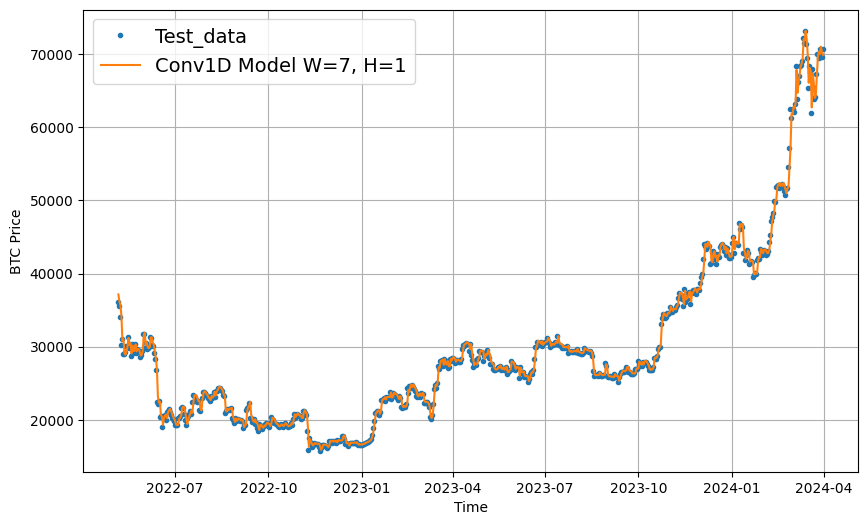

In [ ]:

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=0, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_Conv1D_pred, start=0, format="-", label="Conv1D Model W=7, H=1")





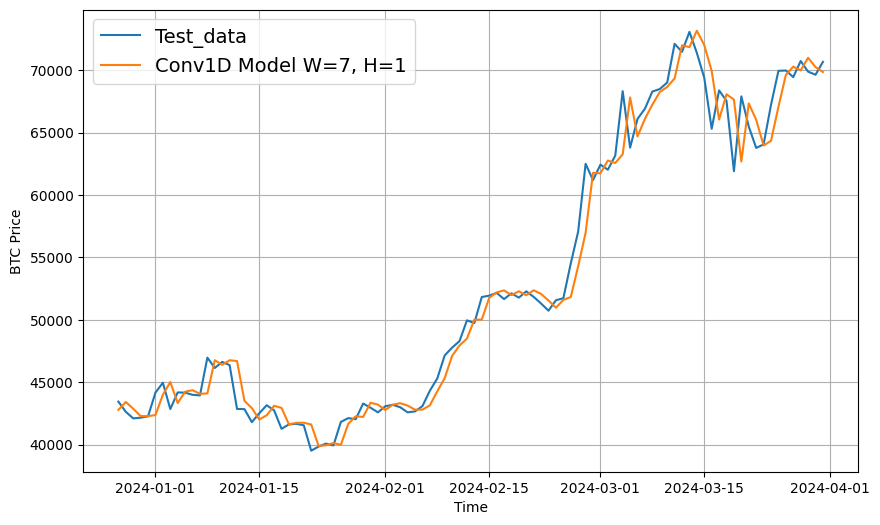

In [ ]:
# let's zoom in it a bit

plt.figure(figsize=(10,6))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='-', start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_Conv1D_pred, start=600, format="-", label="Conv1D Model W=7, H=1")



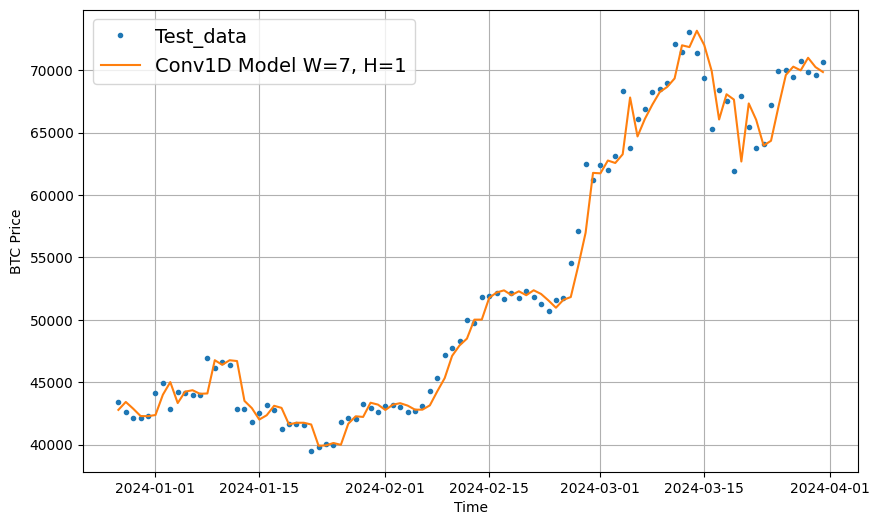

In [ ]:
# let's zoom in it a bit  and use the '.' for test data

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='.',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_Conv1D_pred, start=600, format="-", label="Conv1D Model W=7, H=1")


## LSTM Model W=7, H=1

In [ ]:
inputs = tf.keras.layers.Input(shape=(7),dtype=tf.float32)

x= tf.keras.layers.Lambda(lambda l: tf.expand_dims(l, axis=1))(inputs)

x=tf.keras.layers.LSTM(128, activation='relu')(x)
#x = tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(1,activation='linear')(x)


LSTM_Model=tf.keras.Model(inputs,outputs,name="LSTM_Model")

In [ ]:
LSTM_Model.summary()

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 7)]               0         
                                                                 
 lambda_3 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               69632     
                                                                 
 dense_75 (Dense)            (None, 1)                 129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
LSTM_Model.compile(loss='mae',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])

In [ ]:
LSTM_Model.fit(x=train_windows,
                y=train_labels,
                epochs=100,
                batch_size=128,
                validation_data=(test_windows,test_labels),
                callbacks=[create_model_checkpoint(LSTM_Model.name,'models_chekpoints')])

Epoch 1/100
22/22 [==============================] - 3s 88ms/step - loss: 9037.4893 - mae: 9037.4893 - mse: 253154512.0000 - val_loss: 13580.5430 - val_mae: 13580.5430 - val_mse: 217108096.0000
Epoch 2/100
22/22 [==============================] - 2s 72ms/step - loss: 3079.1804 - mae: 3079.1804 - mse: 34672256.0000 - val_loss: 1130.9839 - val_mae: 1130.9839 - val_mse: 2641599.5000
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 745.5201 - mae: 745.5201 - mse: 2524822.0000 - val_loss: 1290.6274 - val_mae: 1290.6274 - val_mse: 3549607.0000
Epoch 4/100
22/22 [==============================] - 2s 73ms/step - loss: 623.7628 - mae: 623.7628 - mse: 1751058.2500 - val_loss: 973.6492 - val_mae: 973.6492 - val_mse: 2271026.7500
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 589.4354 - mae: 589.4354 - mse: 1563804.1250 - val_loss: 993.1416 - val_mae: 993.1416 - val_mse: 2085432.5000
Epoch 6/100
22/22 [==============================] - 2s 73ms/step

In [ ]:
LSTM_Model=tf.keras.models.load_model("models_chekpoints/LSTM_Model")

In [ ]:
model_LSTM_pred = tf.squeeze( LSTM_Model.predict(test_windows))

model_LSTM_eval = evaluate_preds(y_true=tf.squeeze(test_labels) , y_pred=model_LSTM_pred )

model_LSTM_eval



22/22 [==============================] - 0s 2ms/step


{'MAE': 585.44824,
 'MSE': 913350.25,
 'RMSE': 955.6936,
 'MAPE': 1.9641645,
 'MASE': 1.0392114}

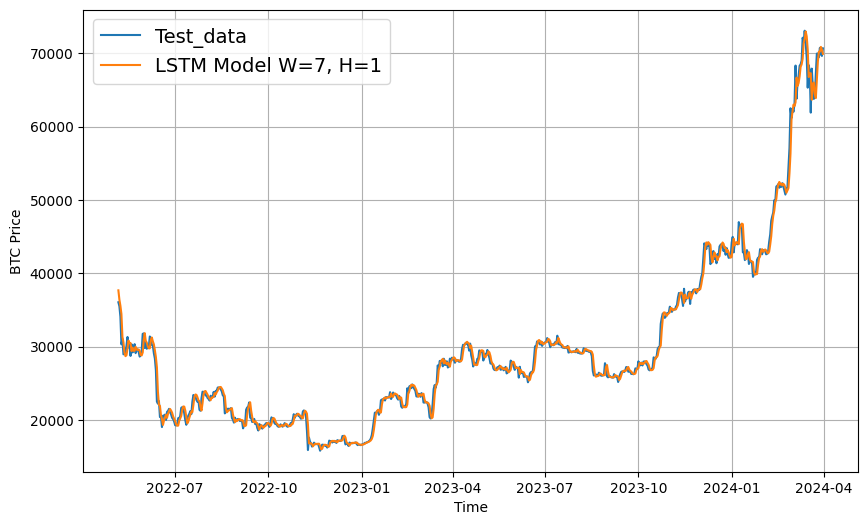

In [ ]:

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=0, format="-",label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_LSTM_pred, start=0, format="-", label="LSTM Model W=7, H=1")





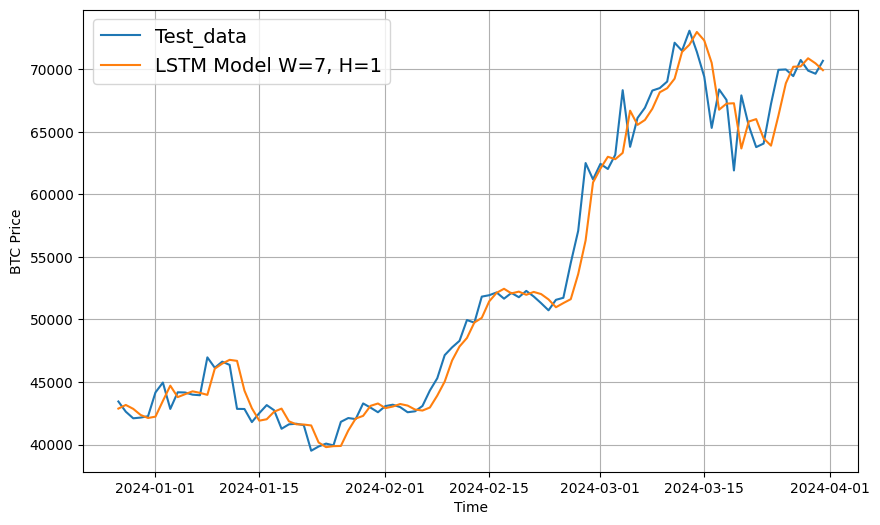

In [ ]:
# let's zoom in it a bit

plt.figure(figsize=(10,6))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='-', start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_LSTM_pred, start=600, format="-", label="LSTM Model W=7, H=1")



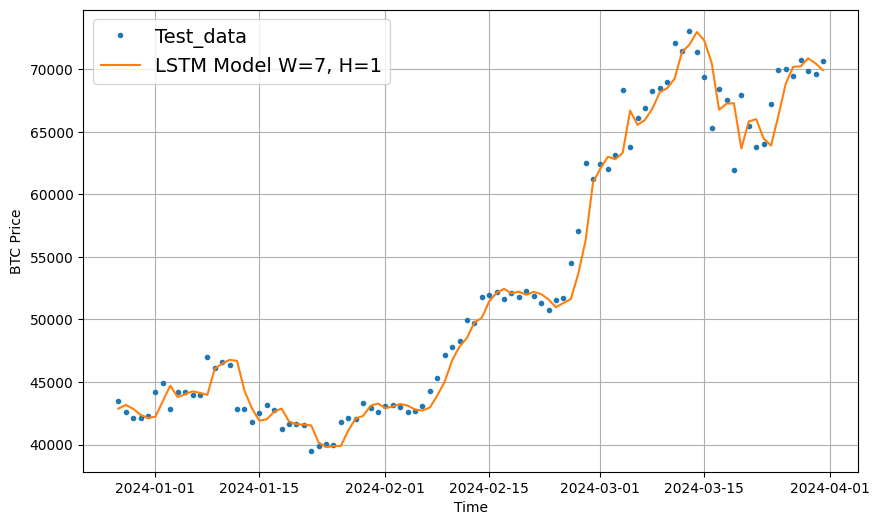

In [ ]:
# let's zoom in it a bit  and use the '.' for test data

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='.',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_LSTM_pred, start=600, format="-", label="LSTM Model W=7, H=1")


## Introducing the Block Halving

**Block Reward**


---


The "block reward" refers to the incentive that Bitcoin miners receive for successfully validating new transactions and adding them to the blockchain. This reward consists of two parts:

Newly Created Bitcoins: When miners add a new block, new bitcoins are created and awarded to the miner. This is known as the block subsidy.
Transaction Fees: Each transaction on the Bitcoin network includes a fee, which is paid by the user making the transaction. These fees are collected and awarded to the miner as part of the block reward.
The block reward provides a financial incentive for miners to contribute their computing power to the network, which is crucial for maintaining the network's security and functionality.

**Bitcoin Halving**


---

Bitcoin halving is an event that reduces the rate at which new bitcoins are generated by the network. This event occurs approximately every four years, or every 210,000 blocks. The "halving" refers to the reduction of the block subsidy by 50%.

**Purpose of Halving**


---

The halving process is a part of Bitcoin's controlled supply mechanism, which was designed by its creator, Satoshi Nakamoto, to introduce a form of digital scarcity. There are three main purposes behind this:

* Control Inflation: By reducing the rate at which new bitcoins are introduced, Bitcoin mimics the extraction rate of a resource like gold—becoming harder and more resource-intensive over time. This counteracts inflationary pressures, which is in stark contrast to fiat currencies that can be printed at will by central banks.
* Decentralization Incentive: By gradually decreasing the reward, the incentive shifts over time from block rewards to transaction fees, which can help maintain miner participation even as the reward diminishes.
* Cap on Total Supply: The halving process ensures that there will never be more than 21 million bitcoins in existence. This cap is expected to be reached around the year 2140. After the final halving, miners will be compensated entirely through transaction fees.

**Impact of Halving**


---

Halvings can have significant effects on the Bitcoin ecosystem:

* Price Impact: Historically, halvings have led to increases in the price of Bitcoin. This is often attributed to the decreased supply of new bitcoins and increased public interest around these events.
* Mining Profitability: Immediately after a halving, the profitability of mining can drop significantly, as the reward for mining a block is halved. This can lead to less efficient miners exiting the network, thereby affecting the network's hash rate and security.

In [ ]:

from datetime import datetime, timedelta

def Add_Halvings_Dates(date_list, halving_values, start_date, end_date, start_halving):
    # Convert start_date and end_date to datetime objects
    start = datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S")
    end = datetime.strptime(end_date,"%Y-%m-%d %H:%M:%S")

    # Convert date_list to datetime objects and zip it with halving_values, then sort
    date_halvings = sorted([(datetime.strptime(date, "%Y-%m-%d %H:%M:%S"), halving) for date, halving in zip(date_list, halving_values)], key=lambda x: x[0])

    # Initialize an empty list to hold the result and set the initial halving value
    result = []
    current_halving = start_halving

    # Generate all dates from start to end
    current_date = start
    while current_date <= end:
        # Update the current_halving if the date is found in date_halvings
        for halving_date, halving in date_halvings:
            if current_date >= halving_date: # Include the halving date itself
                current_halving = halving

        # Check if the current date matches any in date_halvings to set the flag
        flag = 1 if current_date in [dh[0] for dh in date_halvings] else 0

        result.append([current_date.strftime("%Y-%m-%d %H:%M:%S"), flag, current_halving])
        current_date += timedelta(days=1)

    return result


# Example
start_halving=80
dates = ["2024-03-25  00:00:00", "2024-03-29  00:00:00"]
block_reward = [60, 50]
start_date ="2024-03-20 00:00:00"
end_date =  "2024-04-02 00:00:00"
Add_Halvings_Dates(dates, block_reward, start_date, end_date,start_halving)

[['2024-03-20 00:00:00', 0, 80],
 ['2024-03-21 00:00:00', 0, 80],
 ['2024-03-22 00:00:00', 0, 80],
 ['2024-03-23 00:00:00', 0, 80],
 ['2024-03-24 00:00:00', 0, 80],
 ['2024-03-25 00:00:00', 1, 60],
 ['2024-03-26 00:00:00', 0, 60],
 ['2024-03-27 00:00:00', 0, 60],
 ['2024-03-28 00:00:00', 0, 60],
 ['2024-03-29 00:00:00', 1, 50],
 ['2024-03-30 00:00:00', 0, 50],
 ['2024-03-31 00:00:00', 0, 50],
 ['2024-04-01 00:00:00', 0, 50],
 ['2024-04-02 00:00:00', 0, 50]]

In [ ]:
start_date = str(df.index[0])
end_date =   str(df.index[-1])

start_halving=50
halving_dates= ["2012-10-28 00:00:00","2016-07-09 00:00:00","2020-05-11 00:00:00"]
block_reward = [25,12.5,6.25]

halvings=Add_Halvings_Dates(halving_dates, block_reward, start_date, end_date,start_halving)

halvings[:5]



[['2014-09-17 00:00:00', 0, 25],
 ['2014-09-18 00:00:00', 0, 25],
 ['2014-09-19 00:00:00', 0, 25],
 ['2014-09-20 00:00:00', 0, 25],
 ['2014-09-21 00:00:00', 0, 25]]

In [ ]:
len(halvings)

3484

In [ ]:
df.shape #check the shapes


(3484, 6)

In [ ]:
df["halving"]=np.array(halvings)[:,1]
df["Block Reward"]=np.array(halvings)[:,2]

df['halving'] = pd.to_numeric(df['halving'], downcast='integer')
df['Block Reward'] = pd.to_numeric(df['Block Reward'], downcast='integer')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,halving,Block Reward
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0,25.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0,25.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0,25.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0,25.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0,25.0


In [ ]:
df_halvings=df[["Close","halving","Block Reward"]]
df_halvings.head()

,Close,halving,Block Reward
Date,,,
2014-09-17,457.334015,0,25.0
2014-09-18,424.440002,0,25.0
2014-09-19,394.795990,0,25.0
2014-09-20,408.903992,0,25.0
2014-09-21,398.821014,0,25.0


In [ ]:
WINDOW_SIZE=7
btc_prices_windowed=df_halvings.copy()
for i in range(1,WINDOW_SIZE+1):
  btc_prices_windowed[f"Price-{i}"]=btc_prices_windowed['Close'].shift(periods=i)

In [ ]:
btc_prices_windowed

,Close,halving,Block Reward,Price-1,Price-2,Price-3,Price-4,Price-5,Price-6,Price-7
Date,,,,,,,,,,
2014-09-17,457.334015,0,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,0,25.00,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,0,25.00,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,0,25.00,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,0,25.00,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-03-27,69455.343750,0,6.25,69987.835938,69958.812500,67234.171875,64062.203125,63778.761719,65491.390625,67913.671875
2024-03-28,70744.953125,0,6.25,69455.343750,69987.835938,69958.812500,67234.171875,64062.203125,63778.761719,65491.390625
2024-03-29,69892.828125,0,6.25,70744.953125,69455.343750,69987.835938,69958.812500,67234.171875,64062.203125,63778.761719


In [ ]:
btc_prices_windowed=btc_prices_windowed.dropna()
btc_prices_windowed

,Close,halving,Block Reward,Price-1,Price-2,Price-3,Price-4,Price-5,Price-6,Price-7
Date,,,,,,,,,,
2014-09-24,423.204987,0,25.00,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,0,25.00,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,404.424988,0,25.00,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,399.519989,0,25.00,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,377.181000,0,25.00,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014
...,...,...,...,...,...,...,...,...,...,...
2024-03-27,69455.343750,0,6.25,69987.835938,69958.812500,67234.171875,64062.203125,63778.761719,65491.390625,67913.671875
2024-03-28,70744.953125,0,6.25,69455.343750,69987.835938,69958.812500,67234.171875,64062.203125,63778.761719,65491.390625
2024-03-29,69892.828125,0,6.25,70744.953125,69455.343750,69987.835938,69958.812500,67234.171875,64062.203125,63778.761719


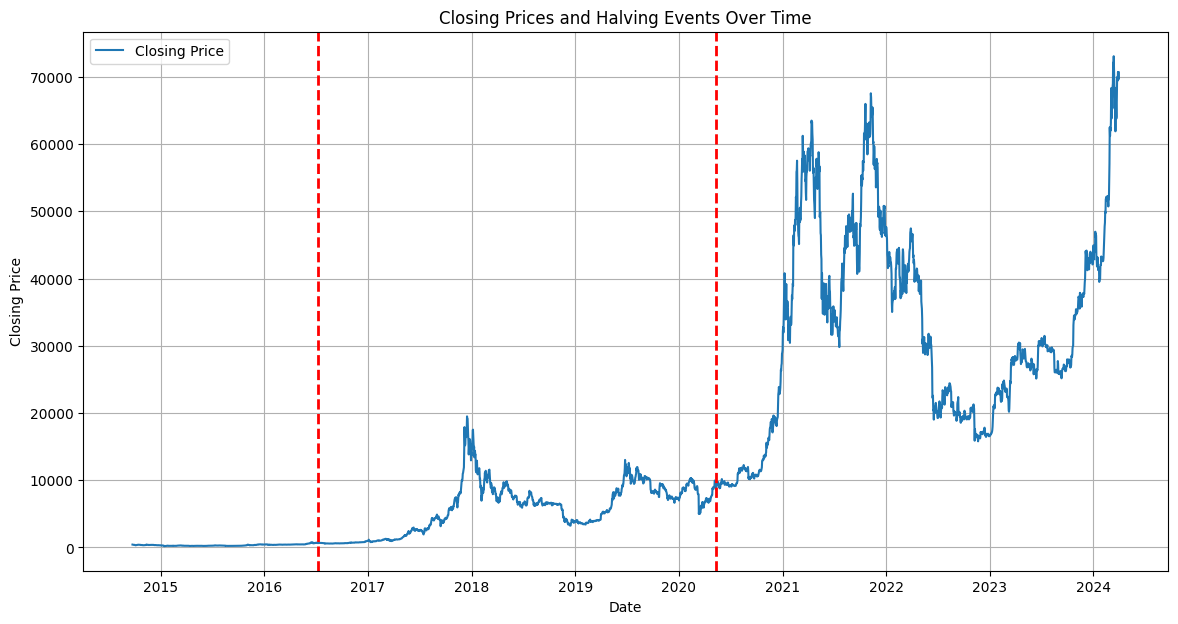

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(btc_prices_windowed.index, btc_prices_windowed['Close'], label='Closing Price')

# Add a vertical line for each halving Day
for date, row in btc_prices_windowed[btc_prices_windowed['halving'] ==1].iterrows():
    plt.axvline(x=date, color='r', linestyle='--', lw=2)

plt.title('Closing Prices and Halving Events Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

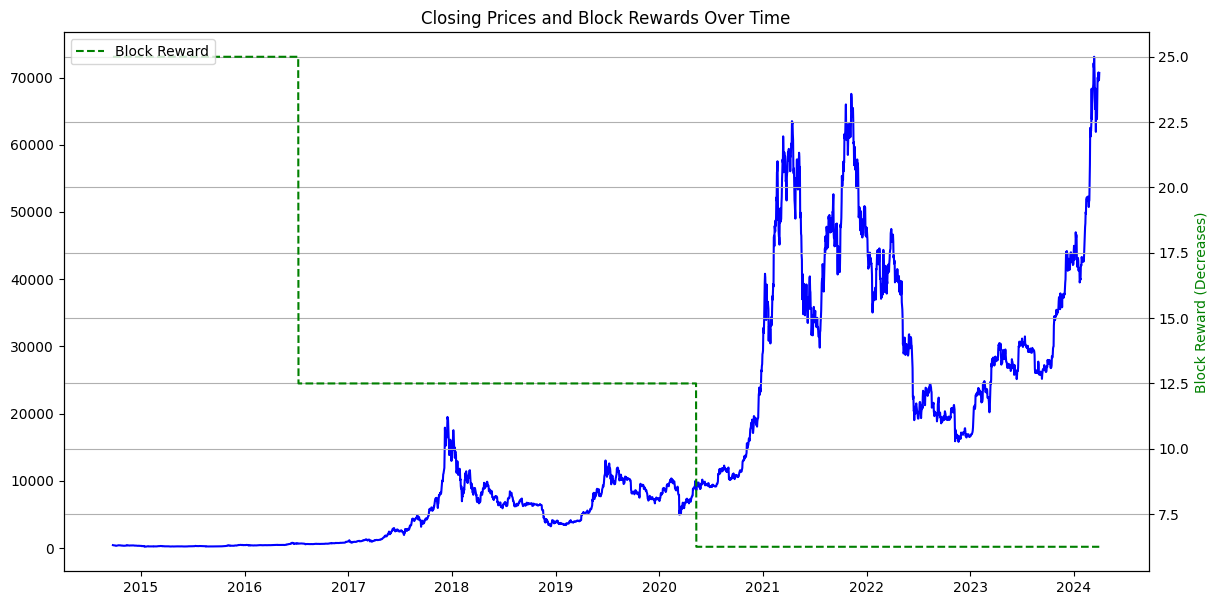

In [ ]:
plt.figure(figsize=(14, 7))

# Primary y-axis for Closing Prices
plt.plot(btc_prices_windowed.index, btc_prices_windowed['Close'], label='Closing Price', color='blue')

# Secondary y-axis for Block Reward
plt.twinx().plot(btc_prices_windowed.index, btc_prices_windowed['Block Reward'], label='Block Reward', color='green', linestyle='--')


plt.title('Closing Prices and Block Rewards Over Time')
plt.xlabel('Date')
plt.ylabel('Block Reward (Decreases)', color='green')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

### Split The Data

In [ ]:
y=btc_prices_windowed['Close']
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Close, dtype: float64

In [ ]:

X=btc_prices_windowed.drop('Close',axis=1)
X.head()

,halving,Block Reward,Price-1,Price-2,Price-3,Price-4,Price-5,Price-6,Price-7
Date,,,,,,,,,
2014-09-24,0,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,0,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,0,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,0,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,0,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
split_size=int(len(X)*0.8)

X_train,y_train=X[:split_size].to_numpy(),y[:split_size].to_numpy()

X_test,y_test = X[split_size:].to_numpy(),y[split_size:].to_numpy()

len(X_train), len(y_train), len(X_test), len(y_test)

(2781, 2781, 696, 696)

In [ ]:
X_train[1]

array([  0.      ,  25.      , 423.204987, 435.790985, 402.152008,
       398.821014, 408.903992, 394.79599 , 424.440002])

### Dense Model

In [ ]:
inputs = tf.keras.layers.Input(shape=(None,9),dtype=tf.float32)

x = tf.keras.layers.Dense(128,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(1,activation='linear')(x)


model_dense2=tf.keras.Model(inputs,outputs,name="model_dense2")

In [ ]:
model_dense2.summary()

Model: "model_dense2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, None, 9)]         0         
                                                                 
 dense_76 (Dense)            (None, None, 128)         1280      
                                                                 
 dense_77 (Dense)            (None, None, 64)          8256      
                                                                 
 dense_78 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 9601 (37.50 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_dense2.compile(loss='mae',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])

In [ ]:
model_dense2.fit(x=X_train,
                y=y_train,
                epochs=100,
                batch_size=128,
                validation_data=(X_test,y_test),
                callbacks=[create_model_checkpoint(model_dense2.name,'models_chekpoints')])

Epoch 1/100
22/22 [==============================] - 2s 42ms/step - loss: 4922.4243 - mae: 4922.4243 - mse: 121617144.0000 - val_loss: 2816.2925 - val_mae: 2816.2925 - val_mse: 10593239.0000
Epoch 2/100
22/22 [==============================] - 1s 34ms/step - loss: 780.8091 - mae: 780.8091 - mse: 2635952.0000 - val_loss: 1121.0729 - val_mae: 1121.0729 - val_mse: 2883971.0000
Epoch 3/100
22/22 [==============================] - 1s 34ms/step - loss: 588.8618 - mae: 588.8618 - mse: 1623517.3750 - val_loss: 919.8897 - val_mae: 919.8897 - val_mse: 2095887.8750
Epoch 4/100
22/22 [==============================] - 1s 34ms/step - loss: 533.5166 - mae: 533.5166 - mse: 1325593.0000 - val_loss: 837.1791 - val_mae: 837.1791 - val_mse: 1732825.3750
Epoch 5/100
22/22 [==============================] - 1s 33ms/step - loss: 506.0034 - mae: 506.0034 - mse: 1189539.0000 - val_loss: 782.0106 - val_mae: 782.0106 - val_mse: 1529536.3750
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss

In [ ]:
model_dense2=tf.keras.models.load_model("models_chekpoints/model_dense2")

In [ ]:
model_dense2_pred = tf.squeeze( model_dense2.predict(X_test))

model_dense2_eval=evaluate_preds(y_true=tf.squeeze(y_test) , y_pred=model_dense2_pred )

model_dense2_eval



22/22 [==============================] - 0s 2ms/step


{'MAE': 562.1163,
 'MSE': 875855.2,
 'RMSE': 935.87134,
 'MAPE': 1.8576576,
 'MASE': 0.9977956}

In [ ]:
naive_forecast_eval

{'MAE': 563.3162,
 'MSE': 884411.94,
 'RMSE': 940.4318,
 'MAPE': 1.8523067,
 'MASE': 0.99992555}

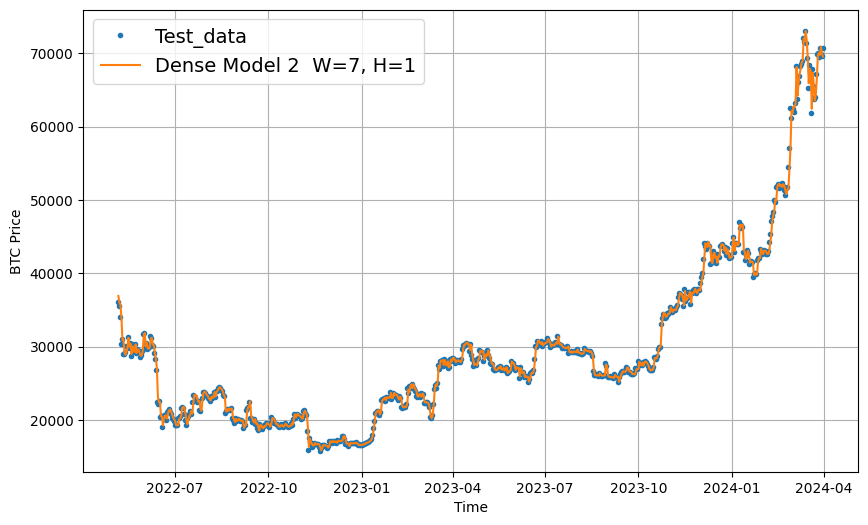

In [ ]:

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=0, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_dense2_pred, start=0, format="-", label="Dense Model 2  W=7, H=1")





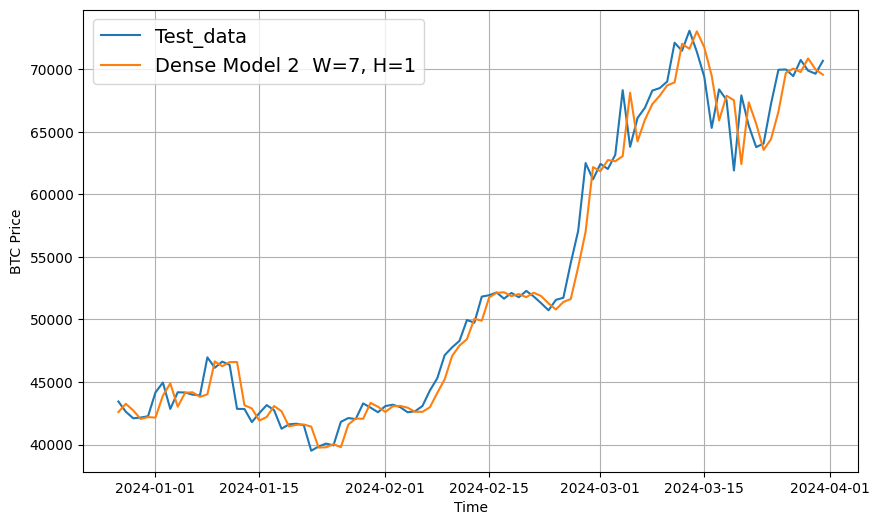

In [ ]:
# let's zoom in it a bit

plt.figure(figsize=(10,6))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='-', start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_dense2_pred, start=600, format="-", label="Dense Model 2  W=7, H=1")



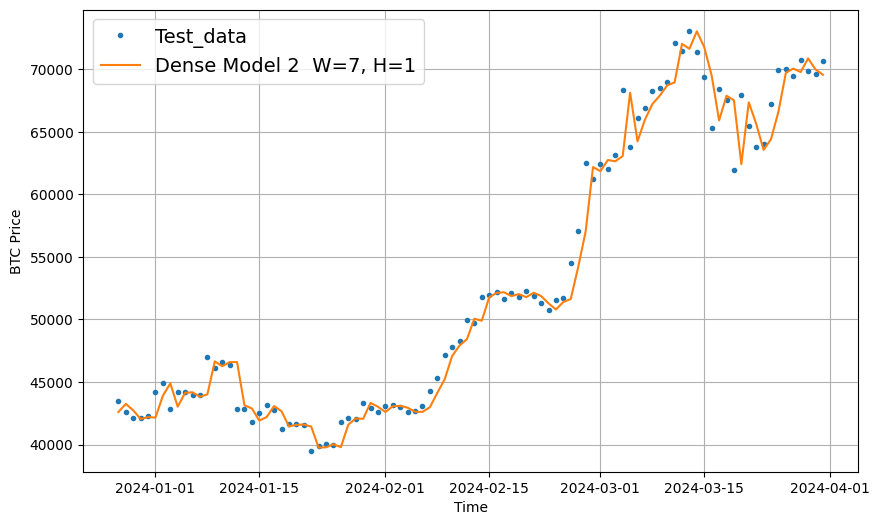

In [ ]:
# let's zoom in it a bit  and use the '.' for test data

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='.',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_dense2_pred, start=600, format="-", label="Dense Model 2  W=7, H=1")


## N-Beeats Model

* Link of the paper : https://arxiv.org/abs/1905.10437

**Introduction:**

---



 the fourth iteration of the competition, known as M4, the winning solution was ES-RNN [2], a hybrid LSTM & Exponential Smoothing model developed by Uber. Interestingly, the 6 (out of 57) pure ML models performed so poorly, they barely surpassed the competition baseline.

That changed one year later. Elemental AI (co-founded by Yoshua Bengio) published N-BEATS [3], a pure Deep-Learning model that outperformed the winning ES-RNN model of M4 by 3%. But there’s more.

*Link:* https://towardsdatascience.com/n-beats-time-series-forecasting-with-neural-basis-expansion-af09ea39f538#:~:text=In%20the%20fourth%20iteration%20of,barely%20surpassed%20the%20competition%20baseline.

**Overview:**


---


The N-BEATS model (Neural Basis Expansion Analysis for Time Series Forecasting) is a deep learning architecture designed specifically for time series forecasting. It was introduced by researchers at Element AI and has gained recognition for its simplicity and effectiveness in handling various forecasting problems. Here’s a detailed summary of its key features and


---


**Architecture:**

N-BEATS is built entirely using feed-forward neural networks (FNNs). Unlike many other time series forecasting models, it does not rely on recurrent neural networks (RNNs) or convolutional neural networks (CNNs). Instead, it uses a series of fully connected layers and is structured in a way that allows for interpretable components to be extracted from the time series data.


---


**Block Design:**

The core component of N-BEATS is its use of blocks, where each block is an independent feed-forward neural network. The model uses a stack of these blocks, each of which makes its own prediction for the output series. The outputs from all blocks are then combined to produce the final prediction. Each block learns different representations of the input data, making the model robust and versatile.


---


**Backcast and Forecast:**

Each block in N-BEATS produces two outputs: a backcast and a forecast. The backcast is the model's reconstruction of the input data, which helps the network to learn by subtracting this reconstruction from the input and allowing the subsequent block to learn from the residual. The forecast is the block's output for future values, contributing to the final prediction.


---


**Training:**

The model is trained end-to-end using backpropagation, optimizing a loss function such as Mean Squared Error (MAE) over the forecast horizon. Each block can be thought of as focusing on correcting the errors made by previous blocks, thus iteratively refining the predictions.


---


**Benefits:**

* Flexibility: It can be used for various lengths of input and output sequences, making it adaptable to different forecasting needs.
* Stackability and Interpretability: Multiple blocks can be stacked to capture complex patterns, and the block-wise setup allows for some degree of interpretability, especially in the interpretable variant.
* Performance: It has shown excellent performance on several benchmark time series datasets, often outperforming other state-of-the-art models.


### Define The NBeats Layer

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):

  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon:    int,
               n_neurons:  int,
               n_layers:   int,
               **kwargs):


    super().__init__(**kwargs)
    self.input_size= input_size
    self.theta_size= theta_size
    self.horizon = horizon
    self.n_neurons= n_neurons
    self.n_layers= n_layers

    self.hidden=[tf.keras.layers.Dense(n_neurons, activation='relu', name=f"Fully_Connected_Layer_{i}") for i in range(1,n_layers+1) ]
    self.theta_layer=tf.keras.layers.Dense(theta_size, activation='linear',name='theta')


  def call(self,inputs):

    x= inputs

    for layer in self.hidden :
      x= layer(x)

    theta= self.theta_layer(x)

    # output the backcast and forecast
    backcast, forecast = theta[:,:self.input_size], theta[:,-self.horizon:]
    return backcast, forecast



In [ ]:


HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:

N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # The "Lookback"
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Construct The Model

In [ ]:
Nbeats_Block_Layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name='NBeats_Block')


Stack_Input=tf.keras.layers.Input(shape=(INPUT_SIZE), name='Stack_inputs')

residuals, forecast = Nbeats_Block_Layer(Stack_Input)



for i in range(N_STACKS-1):
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                           theta_size=THETA_SIZE,
                                           horizon=HORIZON,
                                           n_neurons=N_NEURONS,
                                           n_layers=N_LAYERS,
                                           name=f'Block_N_{i}')(residuals)

    residuals = tf.keras.layers.Subtract(name=f'Subtraction_N_{i}')([residuals, backcast])
    forecast = tf.keras.layers.Add(name=f'Addition_N_{i}')([forecast, block_forecast])


Model_NBeats= tf.keras.Model(inputs=Stack_Input, outputs= forecast)


In [ ]:
Model_NBeats.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Stack_inputs (InputLayer)   [(None, 7)]                  0         []                            
                                                                                                  
 NBeats_Block (NBeatsBlock)  ((None, 7),                  796168    ['Stack_inputs[0][0]']        
                              (None, 1))                                                          
                                                                                                  
 Block_N_0 (NBeatsBlock)     ((None, 7),                  796168    ['NBeats_Block[0][0]']        
                              (None, 1))                                                          
                                                                                            

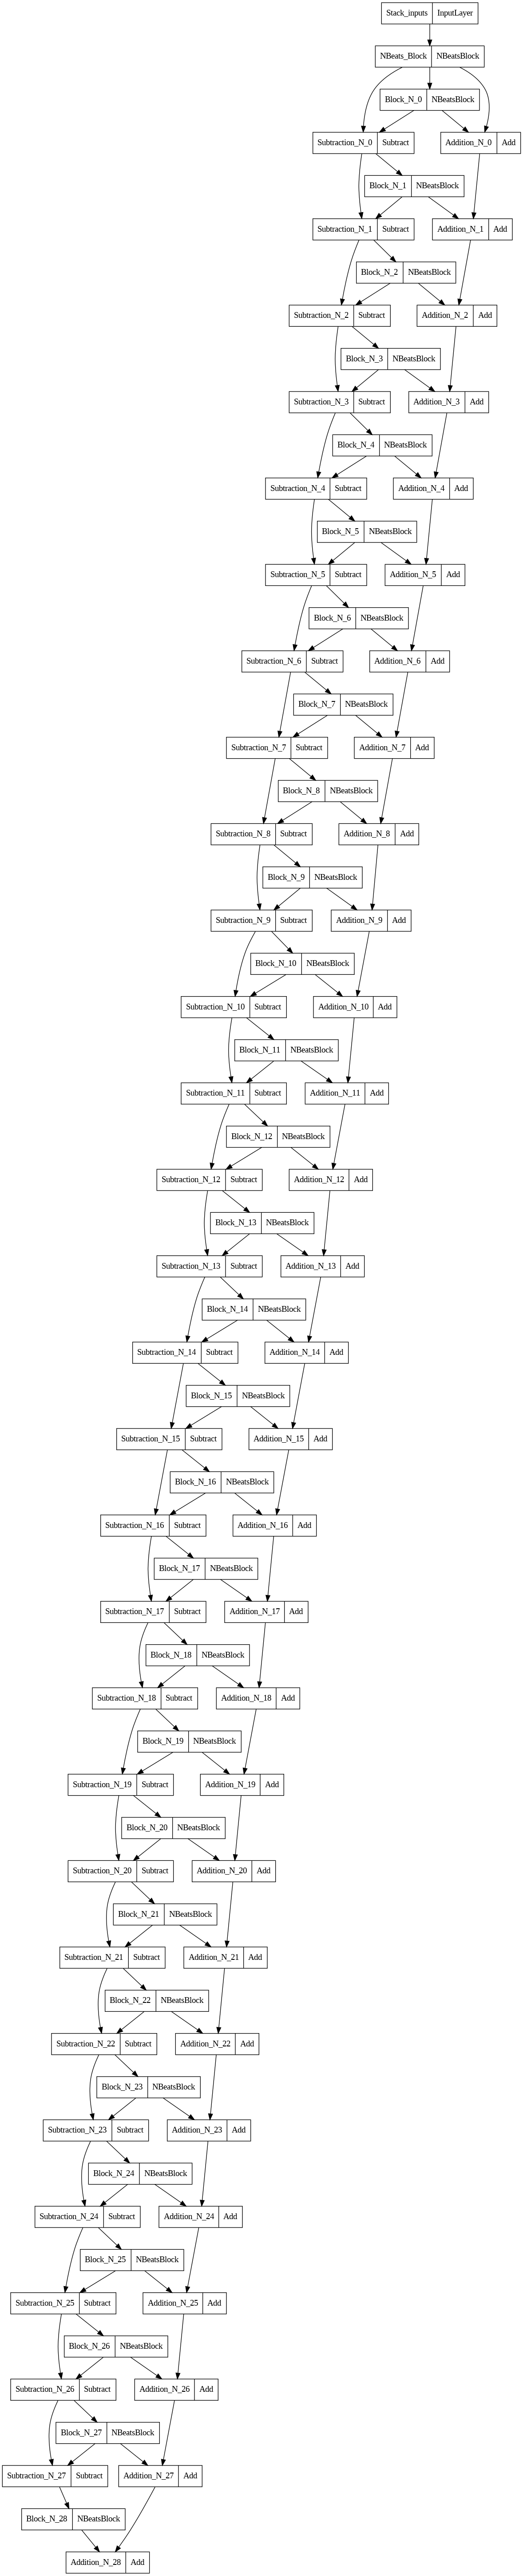

In [ ]:
tf.keras.utils.plot_model(Model_NBeats)

In [ ]:
Model_NBeats.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())

### Prepare The Tf.Dataset

In [ ]:
X=btc_prices_windowed.copy()
X=X.drop('Close',axis=1)
X=X.drop('halving',axis=1)
X=X.drop('Block Reward',axis=1)
X.head()


,Price-1,Price-2,Price-3,Price-4,Price-5,Price-6,Price-7
Date,,,,,,,
2014-09-24,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Close, dtype: float64

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2781, 2781, 696, 696)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features and labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch for optimal performance

BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper **

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
early_stop= tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200, restore_best_weights=True)

reduce_lr= tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=100, verbose=1)

In [ ]:
Model_NBeats.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=test_dataset,
                 verbose=0,
                 callbacks=[early_stop , reduce_lr])


Epoch 610: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 955: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1055: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [ ]:
Model_NBeats.evaluate(test_dataset)

1/1 [==============================] - 0s 26ms/step - loss: 558.8181


558.8180541992188

In [ ]:
naive_forecast_eval

{'MAE': 563.3162,
 'MSE': 884411.94,
 'RMSE': 940.4318,
 'MAPE': 1.8523067,
 'MASE': 0.99992555}

In [ ]:
model_dense_eval

{'MAE': 561.33405,
 'MSE': 875834.1,
 'RMSE': 935.8601,
 'MAPE': 1.8578775,
 'MASE': 0.9964071}

In [ ]:
model_NBeats_pred = tf.squeeze( Model_NBeats.predict(test_dataset))

model_NBeats_eval=evaluate_preds(y_true=tf.squeeze(y_test) , y_pred=model_NBeats_pred )

model_NBeats_eval



1/1 [==============================] - 2s 2s/step


{'MAE': 558.81805,
 'MSE': 864871.75,
 'RMSE': 929.9848,
 'MAPE': 1.8483404,
 'MASE': 0.99194103}

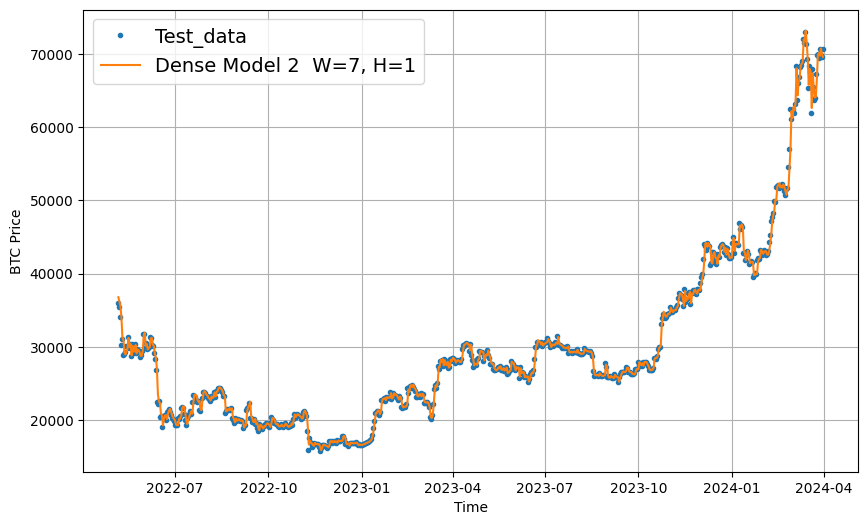

In [ ]:

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=0, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_NBeats_pred, start=0, format="-", label="Dense Model 2  W=7, H=1")





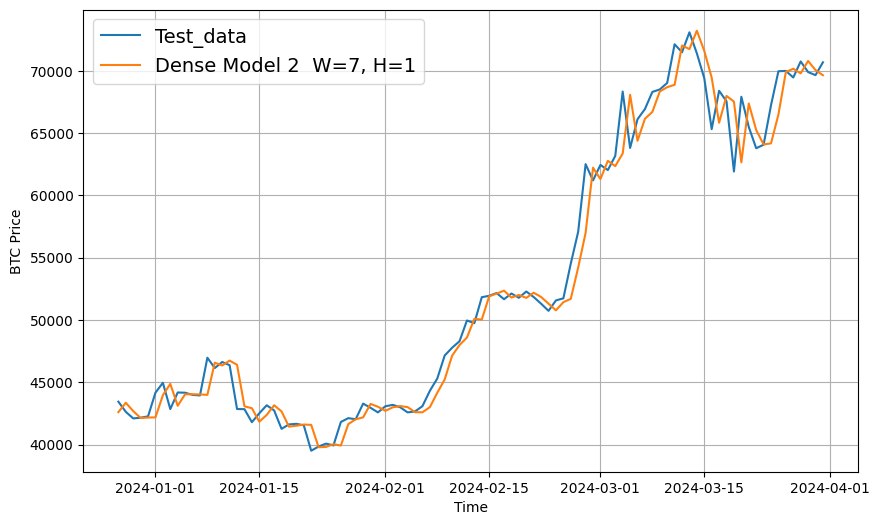

In [ ]:
# let's zoom in it a bit

plt.figure(figsize=(10,6))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='-', start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_NBeats_pred, start=600, format="-", label="Dense Model 2  W=7, H=1")



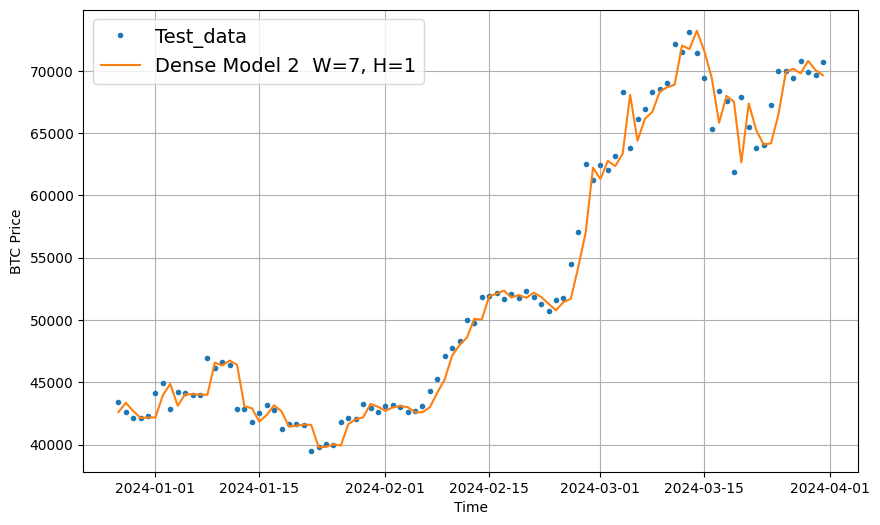

In [ ]:
# let's zoom in it a bit  and use the '.' for test data

plt.figure(figsize=(10,6))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], format='.',start=600, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_NBeats_pred, start=600, format="-", label="Dense Model 2  W=7, H=1")


## Dense Ensemble Model

In [ ]:
def Ensemble_Models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=15,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iteration models each trained on MAE, MSE and MAPE loss.

  """

  ensemble_models = []

  # Create num_iteration number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple Dense model
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution
        tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        tf.keras.layers.Dense(HORIZON)
      ])

      # Compile simple model with corresponding  loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])


      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
ensemble_models = Ensemble_Models(num_iter=5,
                                  num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 122: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 506: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 606: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 639: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 739: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 119: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 538: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 644: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 744: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 205:

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 49ms/step


<tf.Tensor: shape=(15, 696), dtype=float32, numpy=
array([[36890.996, 36086.863, 35744.59 , ..., 70887.03 , 70190.09 ,
        69894.445],
       [36535.246, 36314.26 , 35406.598, ..., 71258.01 , 70302.47 ,
        70029.16 ],
       [36557.05 , 36474.395, 35117.246, ..., 70965.164, 70126.59 ,
        69718.17 ],
       ...,
       [37277.375, 36173.414, 35681.27 , ..., 71171.875, 70327.52 ,
        69209.016],
       [36766.773, 36163.543, 35114.426, ..., 71092.59 , 70269.8  ,
        69694.69 ],
       [36645.547, 36129.492, 35391.844, ..., 70784.85 , 70056.78 ,
        69745.48 ]], dtype=float32)>

In [ ]:
#Evaluate with the Median
ensemble_results_median = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results_median


{'MAE': 562.8391,
 'MSE': 872512.56,
 'RMSE': 934.0838,
 'MAPE': 1.8572615,
 'MASE': 0.9990787}

In [ ]:
#Evaluate with the Mean

ensemble_results_mean = evaluate_preds(y_true=y_test,
                                  y_pred=np.mean(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results_mean


{'MAE': 563.044,
 'MSE': 873534.9,
 'RMSE': 934.63086,
 'MAPE': 1.8580863,
 'MASE': 0.99944234}

In [ ]:
def get_upper_lower_bounds(preds):

  # Get the upper and lower bounds of the 95% percentile
  std = tf.math.reduce_std(preds, axis=0)

  # Multiply the standard deviation by 1.96
  interval = 1.96 * std

  #prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper


lower, upper = get_upper_lower_bounds(preds=ensemble_preds)

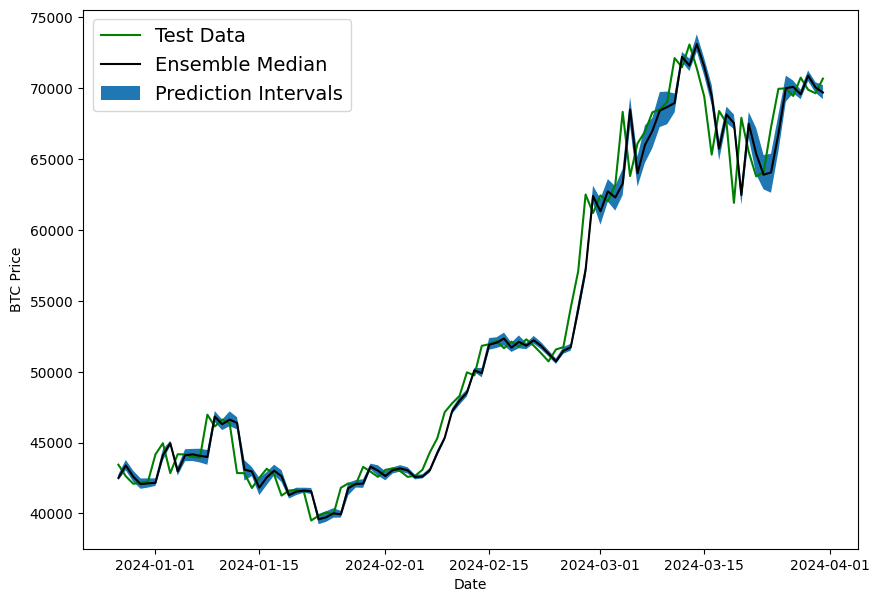

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals
offset=600
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

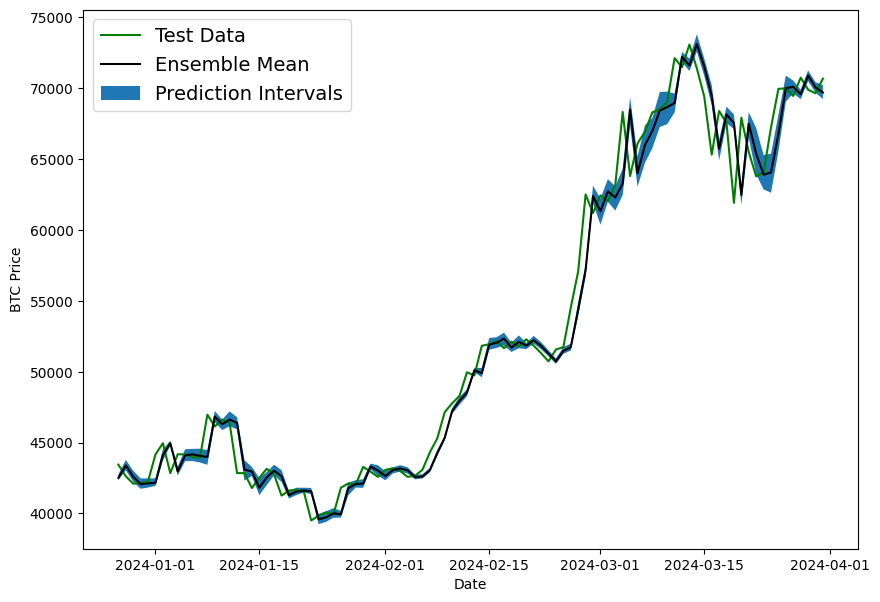

In [ ]:
ensemble_mean = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals
offset=600
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_mean[offset:], "k-", label="Ensemble Mean")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

# Results Summary

In [ ]:
Results=pd.DataFrame({
    "Naive Forecast Model" : naive_forecast_eval ,
    "Dense Model W=7, H=1" :  model_dense_eval,
    "Dense Model W=30, H=1"   : model_dense_30_eval,
    "Conv1D Model W=7, H=1": model_Conv1D_eval,
    "LSTM Model W=7, H=1" : model_LSTM_eval,
    "Dense Model + Halving & Block Reward" : model_dense2_eval,
    "N_Beats Model" : model_NBeats_eval,
    "Dense Ensemble Model Mean" : ensemble_results_mean,
    "Dense Ensemble Model Median" : ensemble_results_median


}

)
Results=Results.transpose()
Results




,MAE,MSE,RMSE,MAPE,MASE
Naive Forecast Model,563.316223,884411.9375,940.431824,1.852307,0.999926
"Dense Model W=7, H=1",561.334045,875834.1250,935.860107,1.857877,0.996407
"Dense Model W=30, H=1",626.360901,977026.8750,988.446655,2.097677,1.128497
"Conv1D Model W=7, H=1",567.899719,867553.8125,931.425720,1.892349,1.008062
"LSTM Model W=7, H=1",585.448242,913350.2500,955.693604,1.964164,1.039211
Dense Model + Halving & Block Reward,562.116272,875855.1875,935.871338,1.857658,0.997796
N_Beats Model,558.818054,864871.7500,929.984802,1.848340,0.991941
Dense Ensemble Model Mean,563.044006,873534.8750,934.630859,1.858086,0.999442
Dense Ensemble Model Median,562.839111,872512.5625,934.083801,1.857262,0.999079


In [ ]:
Results["MAE"]

Naive Forecast Model                    563.316223
Dense Model W=7, H=1                    561.334045
Dense Model W=30, H=1                   626.360901
Conv1D Model W=7, H=1                   567.899719
LSTM Model W=7, H=1                     585.448242
Dense Model + Halving & Block Reward    562.116272
N_Beats Model                           558.818054
Dense Ensemble Model Mean               563.044006
Dense Ensemble Model Median             562.839111
Name: MAE, dtype: float32

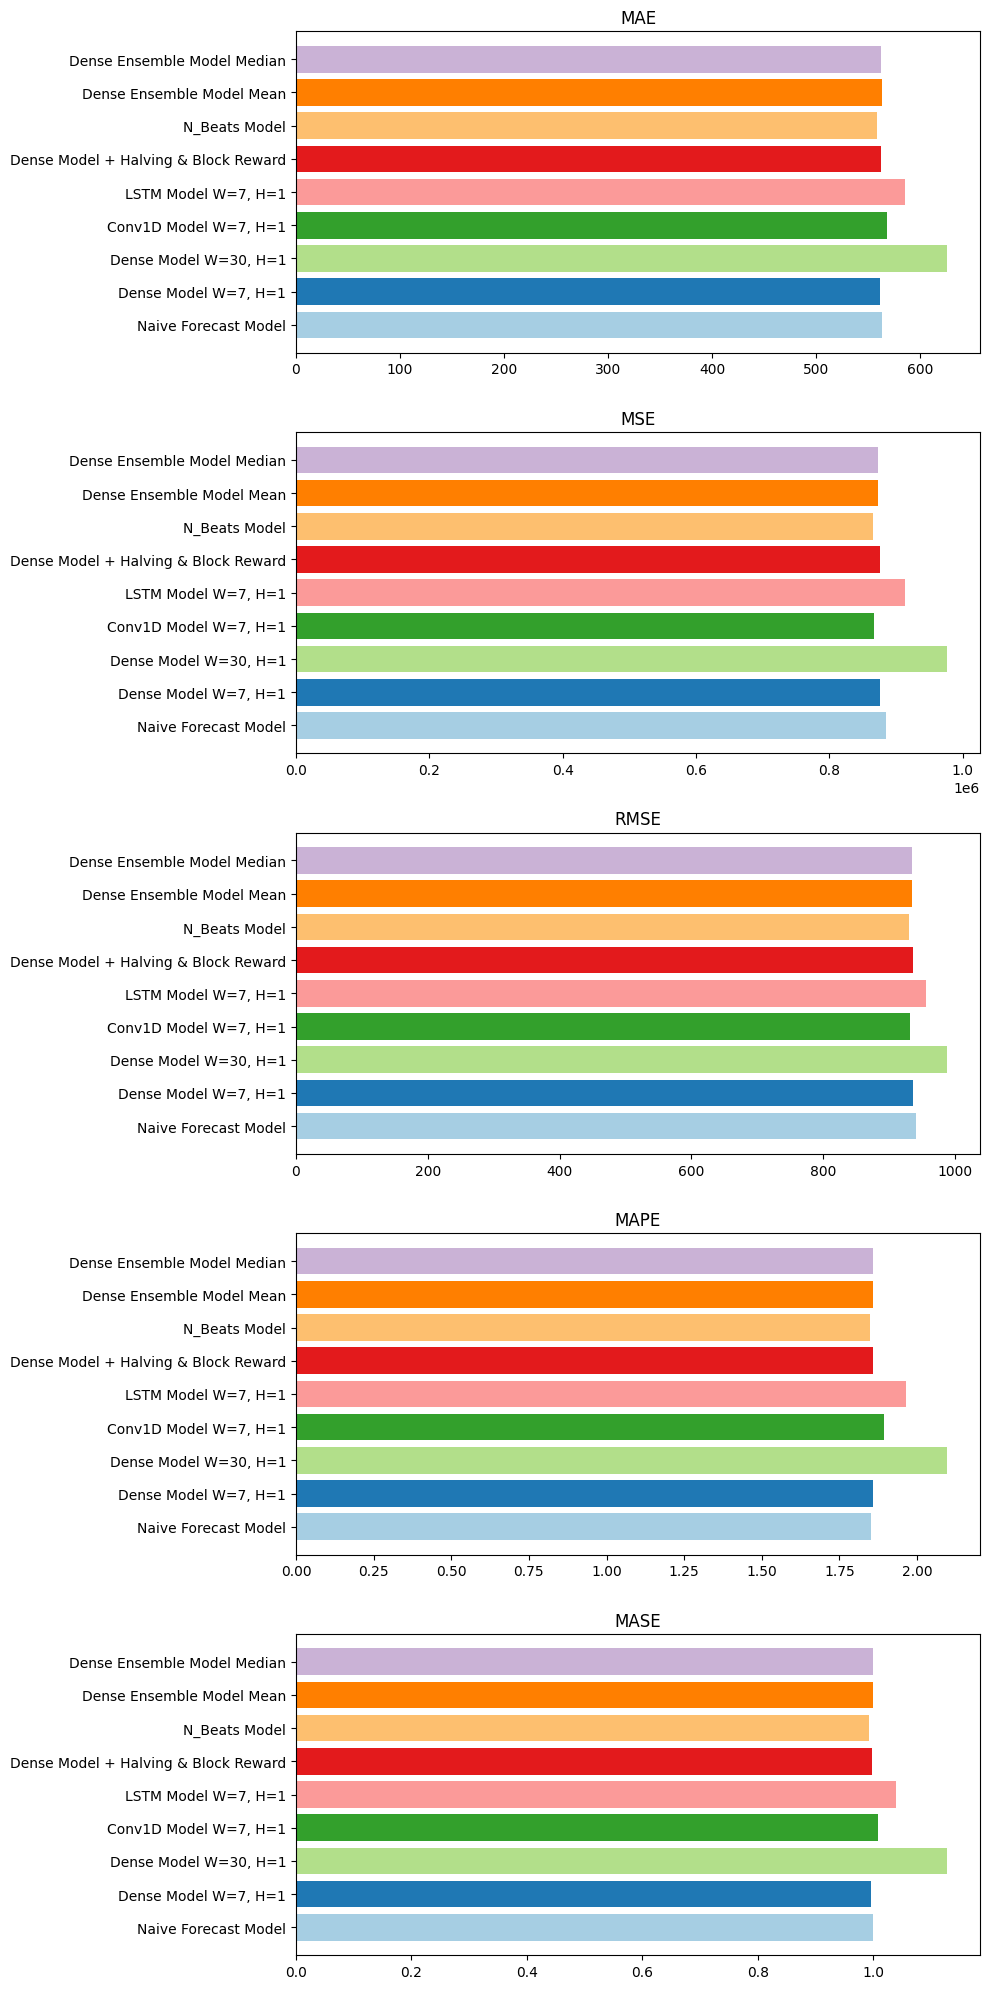

In [ ]:

## Plot the Models per Metric

metrics_to_plot=Results.columns

fig, axs = plt.subplots(len(metrics_to_plot), 1, figsize=(10, 20))

for i, metric in enumerate(metrics_to_plot):
    axs[i].barh(Results.index, Results[metric], color=plt.cm.Paired(np.arange(len(Results))))
    axs[i].set_title(metric)

plt.tight_layout()
plt.show()

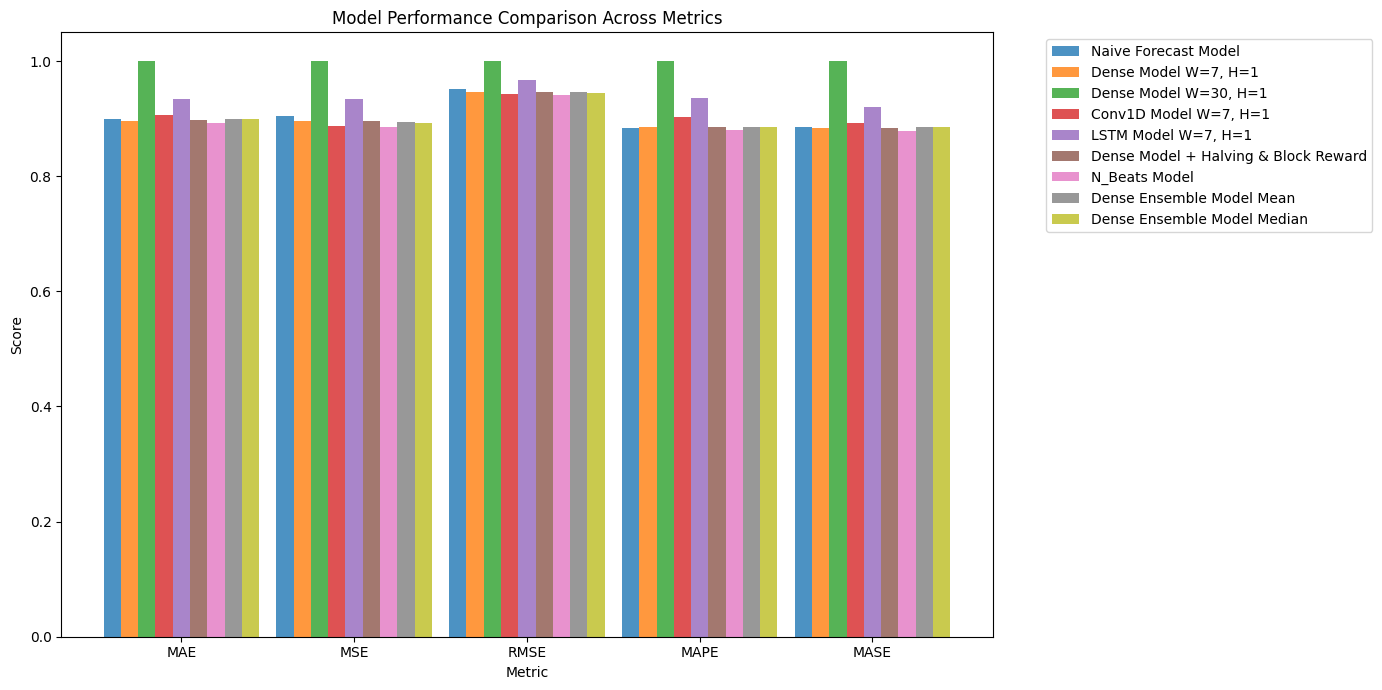

In [ ]:

## summarize the reults into one plot

metrics = Results.columns
n_metrics = len(metrics)
models = Results.index
n_models = len(models)
bar_width = 0.1  # Adjusting the width for clarity since there are many models
opacity = 0.8


index = np.arange(n_metrics)

plt.figure(figsize=(14, 7))

for i, model in enumerate(models):
    plt.bar(index + i * bar_width, Results.loc[model], bar_width, alpha=opacity, label=model)

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison Across Metrics')
plt.xticks(index + bar_width * (n_models - 1) / 2, metrics)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Future Forecast

In [ ]:
btc_prices_windowed.head()

,Close,halving,Block Reward,Price-1,Price-2,Price-3,Price-4,Price-5,Price-6,Price-7
Date,,,,,,,,,,
2014-09-24,423.204987,0,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,0,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,404.424988,0,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,399.519989,0,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,377.181000,0,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [ ]:
X_all = btc_prices_windowed.drop(["Close", "Block Reward","halving"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = btc_prices_windowed.dropna()["Close"].to_numpy()

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all



tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_all = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON)
])

# Compile
model_all.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_all.fit(dataset_all,
            epochs=100,
            verbose=0)

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """

  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)


  for _ in range(into_future):


    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())
    print(future_forecast)

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_all,
                                       into_future=14 , # 14 Days Ahead (2 weeks)
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 56ms/step
Predicting on: 
 [69958.8125   69987.835938 69455.34375  70744.953125 69892.828125
 69645.304688 70677.117188] -> Prediction: 69957.8046875

[69957.805]
1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [69987.835938  69455.34375   70744.953125  69892.828125  69645.304688
 70677.117188  69957.8046875] -> Prediction: 69676.9453125

[69957.805, 69676.945]
1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [69455.34375   70744.953125  69892.828125  69645.304688  70677.117188
 69957.8046875 69676.9453125] -> Prediction: 69693.7890625

[69957.805, 69676.945, 69693.79]
1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [70744.953125  69892.828125  69645.304688  70677.117188  69957.8046875
 69676.9453125 69693.7890625] -> Prediction: 70371.1484375

[69957.805, 69676.945, 69693.79, 70371.15]
1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [69892.828125  69645.304688  

In [ ]:
def future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = btc_price.index[-1]
last_timestep


Timestamp('2024-03-31 00:00:00')

In [ ]:
next_time_steps = future_dates(start_date=last_timestep,
                                   into_future=14)
next_time_steps

array(['2024-04-01', '2024-04-02', '2024-04-03', '2024-04-04',
       '2024-04-05', '2024-04-06', '2024-04-07', '2024-04-08',
       '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
       '2024-04-13', '2024-04-14'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2024-03-31', '2024-04-01', '2024-04-02', '2024-04-03',
        '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07',
        '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11',
        '2024-04-12', '2024-04-13', '2024-04-14'], dtype='datetime64[D]'),
 array([70677.12 , 69957.805, 69676.945, 69693.79 , 70371.15 , 69712.49 ,
        69764.9  , 70134.336, 69812.27 , 69546.88 , 69746.22 , 70011.52 ,
        69603.93 , 69663.8  , 69820.02 ], dtype=float32))

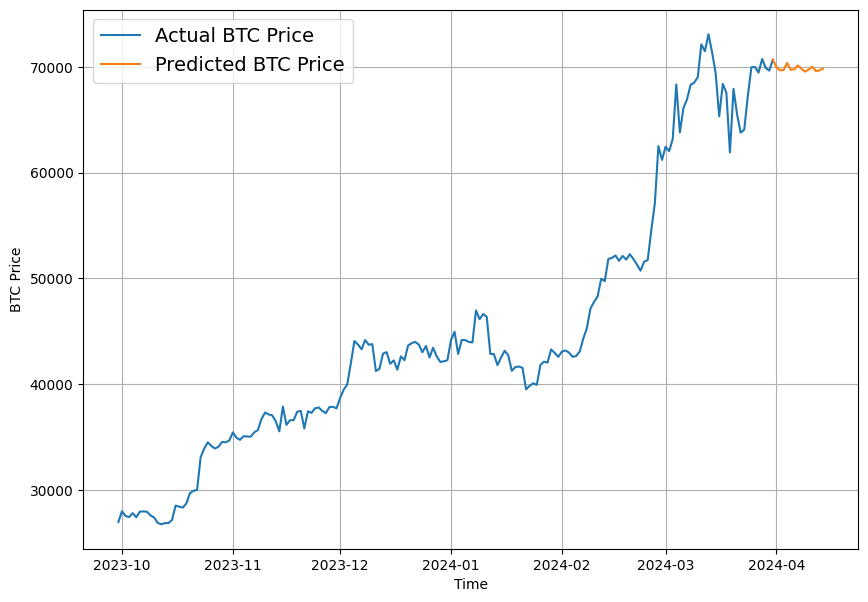

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(btc_price.index, btc_price, start=3300, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")
